# Part 1

In [1]:
# load library
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('./DATA/SLATE.xlsx')
df = df[df['Degree']=='Master\'s']
df = df[df['Time Status']=='Full Time']
period = ['Fall 2022','Fall 2023','Spring 2022','Spring 2023', 'Summer 2022', 'Summer 2023']
df_temp = df[~df['Entry Term'].isin(period)]

## Session 1

Session 1: Who applies to each of our programs? What is the makeup of those who get admitted and those who accept our offer. How are they similar and how do they differ? 

### Race

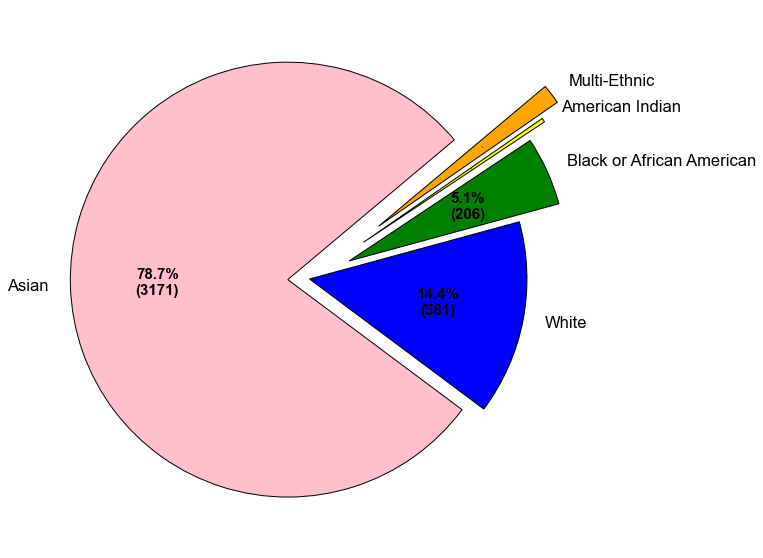

In [3]:
# plot pie chart (percent of each race for all applicants)
sns.set(font_scale=1.5)
Race = ['Asian', 'White', 'Black or African American', 'American Indian', 'Multi-Ethnic']
data = [3171, 582, 206, 12, 59]
explode = (0.1, 0.0, 0.2, 0.3, 0.4)
colors = ( "pink", "blue", "green","yellow","orange")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10,10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Race,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 40,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

 
plt.setp(autotexts[0:3], size = 15, weight ="bold")
plt.setp(autotexts[3::], size = 0, weight ="bold")
#ax.set_title("Pie Chart of Race (All Applicants)")
 
# show plot
plt.show()

### URM

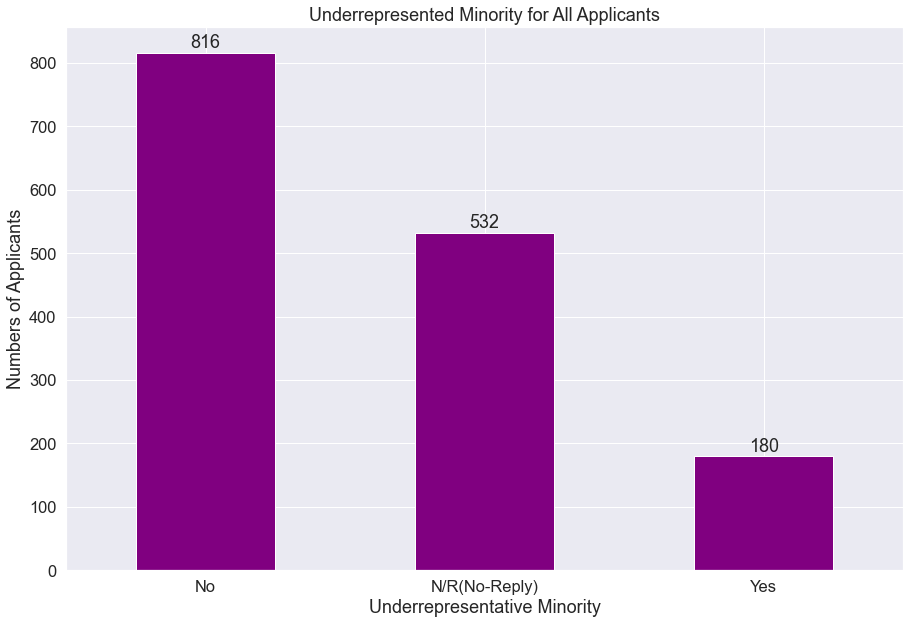

In [4]:
# URM=Underrepresentative Minority
# plot underrepresented minority for all applicants
gender = df['URM'].value_counts()
plt.figure(figsize=(15,10))
ax = gender.plot(kind='bar', rot=0, color='purple')
ax.set_title("Underrepresented Minority for All Applicants", y = 1)
ax.set_xlabel('Underrepresentative Minority')
ax.set_ylabel('Numbers of Applicants')
ax.set_xticklabels(('No', 'N/R(No-Reply)', 'Yes'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

### Hispanic

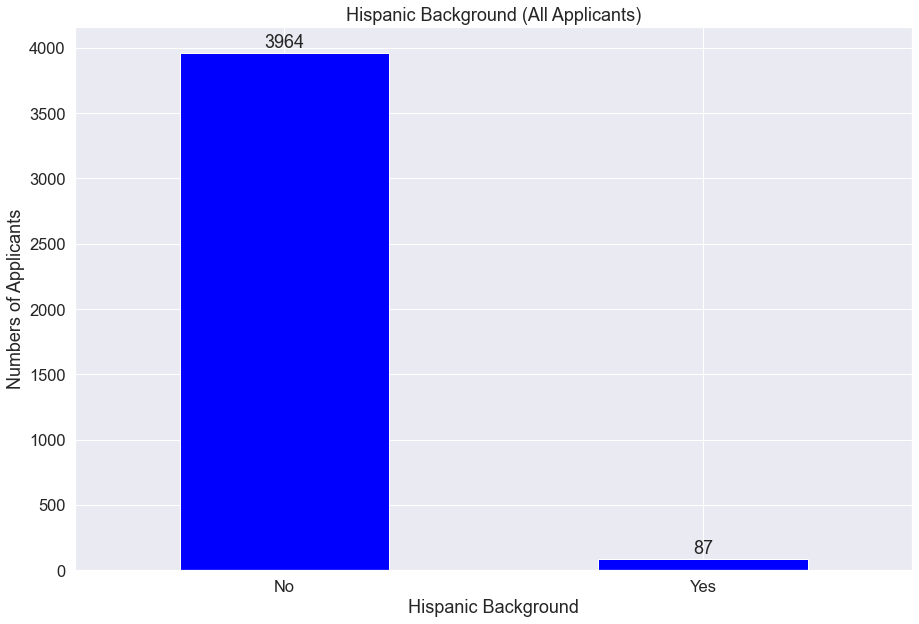

0.02147617872130338

In [5]:
# Hispanic
# plot HIspanic background for all applicants
gender = df['Hispanic'].value_counts()
plt.figure(figsize=(15,10))
ax = gender.plot(kind='bar', rot=0, color='blue')
ax.set_title("Hispanic Background (All Applicants)", y = 1)
ax.set_xlabel('Hispanic Background')
ax.set_ylabel('Numbers of Applicants')
ax.set_xticklabels(('No', 'Yes'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

87/4051 # yes out of who respond to it.

### Native Language

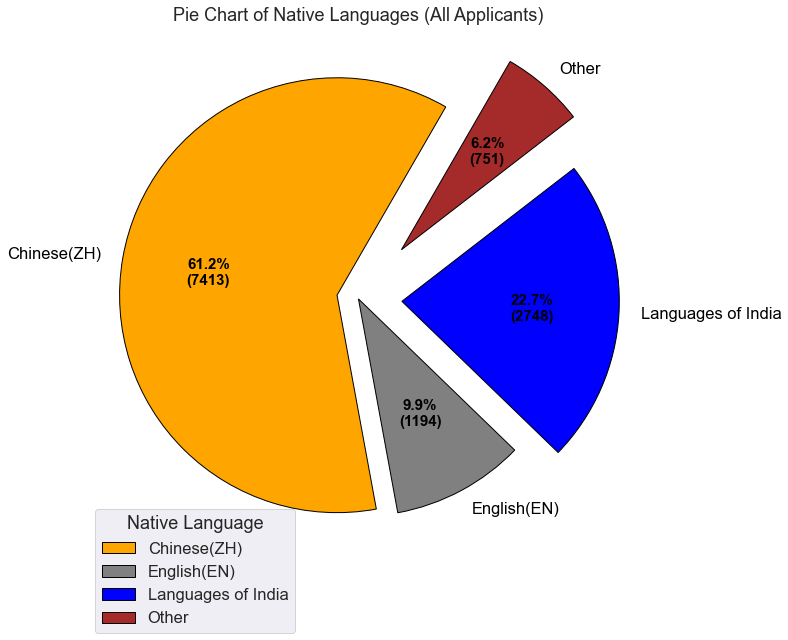

In [6]:
# native language for all applicants

Native_Language = ['Chinese(ZH)', 'English(EN)', 'Languages of India','Other']
data = [7414, 1195, 2749, 751]
explode = (0.1, 0.0, 0.2, 0.3)
colors = ( "orange", "gray", "blue","brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10,10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Native_Language,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, Native_Language,
          title ="Native Language",
          loc ="center left",
          bbox_to_anchor =(0, 0, 0, 0))
 
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Pie Chart of Native Languages (All Applicants)")
 
# show plot
plt.show()

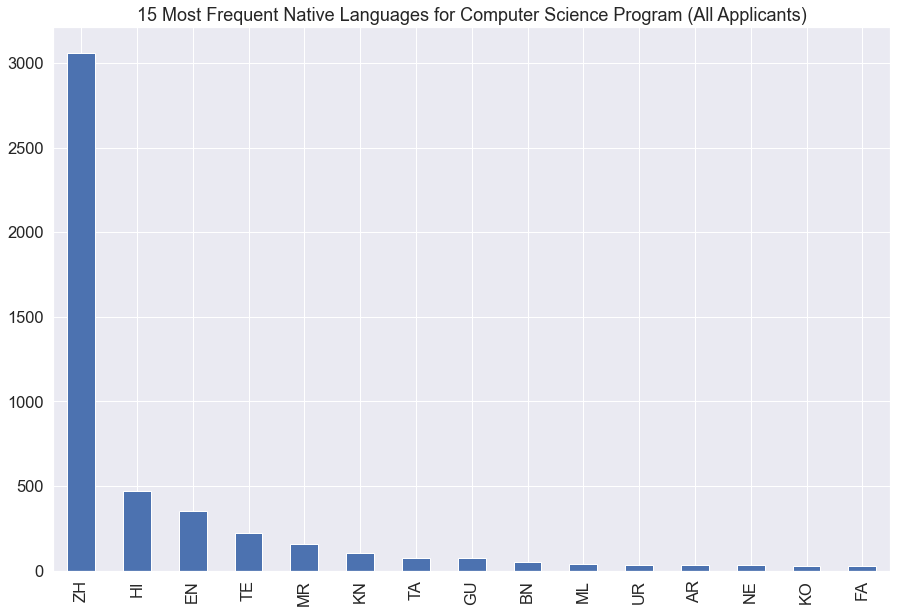

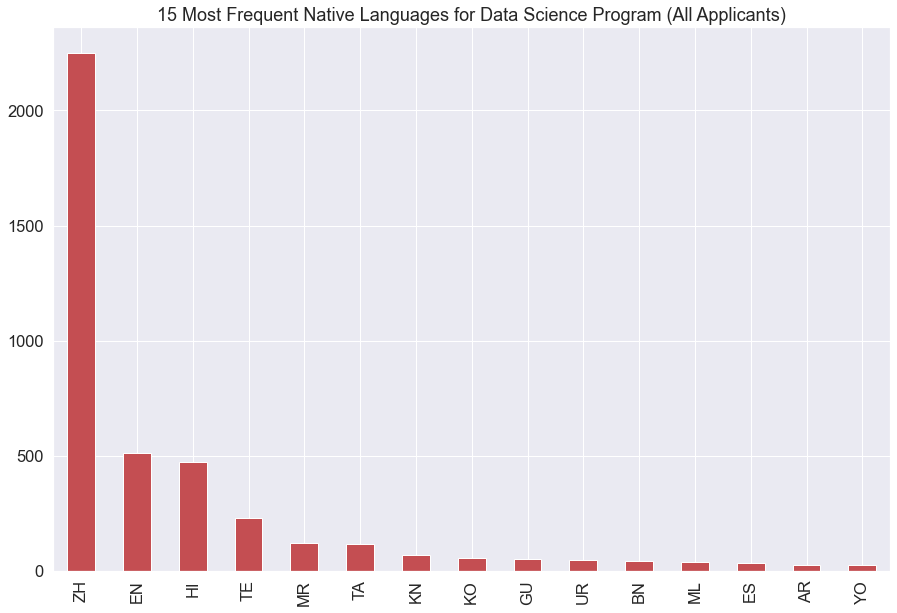

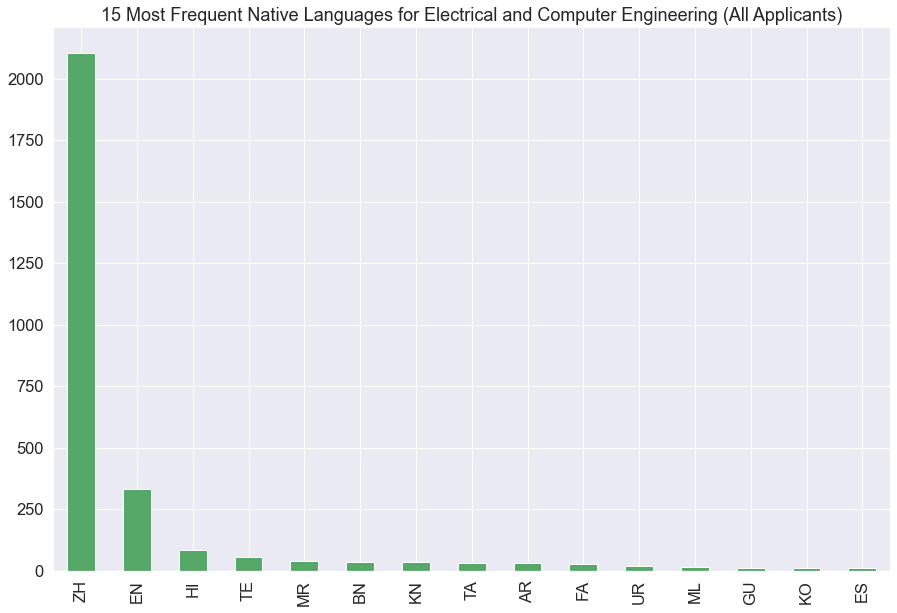

In [7]:
# top native language for each program
co_df = df.loc[df['Program (ASE)'] == 'Computer Science']
fig, ax = plt.subplots(1,figsize=(15,10))
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Computer Science Program (All Applicants)', color='b')

co_df = df.loc[df['Program (ASE)'] == 'Data Science']
fig, ax = plt.subplots(1,figsize=(15,10))
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Data Science Program (All Applicants)', color='r')

co_df = df.loc[df['Program (ASE)'] == 'Electrical and Computer Engineering']
fig, ax = plt.subplots(1,figsize=(15,10))
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Electrical and Computer Engineering (All Applicants)', color='g')

### Gender

['M' 'F' nan]
473
M    8647
F    3566
Name: Sex, dtype: int64


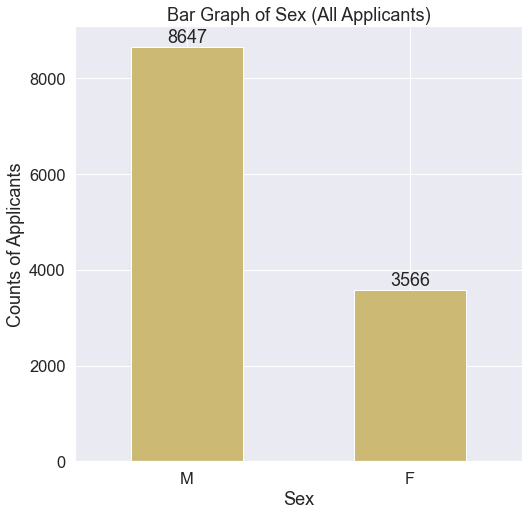

In [8]:
### Gender

print(df['Sex'].unique())
print(df['Sex'].isnull().sum())
print(df['Sex'].value_counts())

# plot sex for all applicants
gender = df['Sex'].value_counts()
plt.figure(figsize=(8,8))
ax = gender.plot(kind='bar', rot=0, color='y')
ax.set_title("Bar Graph of Sex (All Applicants)", y = 1)
ax.set_xlabel('Sex')
ax.set_ylabel('Counts of Applicants')
ax.set_xticklabels(('M', 'F'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

### Career Plan

In [9]:
pip install --upgrade clean-text

     |████████████████████████████████| 53 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 175 kB 1.1 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171047 sha256=7641caa70365fc566e4d73cfdae3e8e41e2c7f055cc2bc2bcf648ebc13e01aab
  Stored in directory: /Users/lucindalu/Library/Caches/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Tokenize each text in the word list
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import nltk
import nltk
#nltk.download()
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/lucindalu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lucindalu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucindalu/nltk_data...


True

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lucindalu/nltk_data...


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucindalu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# df["Career Plan"] = df["Career Plan"].astype(str)
# new_list = []
# # tokenize: split the sentence into words
# for text in df["Career Plan"]:
#     word_list = nltk.word_tokenize(text)
#     new_list.append(word_list)
# new_list
# type(new_list)

# # use the POS-tagging feature for the tokenized words
# from nltk.corpus import wordnet

# def get_wordnet_pos(word):
# # Map POS tag to first character lemmatize() accepts
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)

# # initiate the Wordnet Lemmatizer
# lemmatizer = WordNetLemmatizer()
# lemmatized_list = []
# for i in range(len(new_list)):
#     temp = [lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in new_list[i]]
#     lemmatized_list.append(temp)
# lemmatized_list[0]

# # install stopword list
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# print(stopwords.words('english'))

# stop_words = set(stopwords.words('english'))
 
# # install stopword list
# filtered_list = []
 
# for j in range(len(lemmatized_list)):
#     obs = lemmatized_list[j]
#     filtered_list.append([item.lower() for item in obs if item.lower() not in stop_words])
# # use join space'' function to turn list of list into list of string
# filtered_list_new = [' '.join(sent) for sent in filtered_list]
# filtered_list_new[2]
# #type(filtered_list_new[0])
# # remove all stand-alone numbers and leave number-character combinations as is
# import re

# list_nonumbers = []
# for i in range(len(filtered_list_new)):
#     text = filtered_list_new[i]
#     words_nonumbers = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
#     list_nonumbers.append(words_nonumbers)
# list_nonumbers[2]

# # remove punctuation
# list_nopunc = []
# for i in range(len(list_nonumbers)):
#     text = list_nonumbers[i]
#     #words_nopunc = re.sub(r'[^\w\s]','',text)
#     words_nopunc = re.sub("[^A-Za-z ]", "" , text)
#     list_nopunc.append(words_nopunc)
# list_nopunc[0]

# # remove links
# import re
# list_nolinks = []
# for i in range(len(list_nopunc)):
#     text = list_nopunc[i]
#     words_nolinks = re.sub('http://\S+|https://\S+', '', text)
#     list_nolinks.append(words_nolinks)
# list_nolinks[0]

# # remove emoji

# # remove emoji

# from cleantext import clean

# list_noemoji = []
# for i in range(len(list_nolinks)):
#     text = list_nolinks[i]
#     if text=='':
#       text += " "
#     words_noemoji = clean(text)
#     list_noemoji.append(words_noemoji)
# list_noemoji[120]

# # remove words that are shorter than 2 characters
# list_final = []
# for i in range(len(list_noemoji)):
#     text = list_noemoji[i]
#     words_final = re.sub(' \w{1} ', ' ', text)
#     list_final.append(words_final)
# list_final[0]


# # convert the obtained list of tokenized+tagged+lemmatized+cleaned list of words back into a joined string (joined by space ‘ ‘ ) and add the result as text_clean column to your dataset.
# # I've already used "join" function before to create a list of strings, so I will skip this step here.
# text_clean = list_final
# df['Cleaned Career Plan'] = text_clean
# df


# df['Cleaned Career Plan']

# # generate word cloud
# # import libary
# from wordcloud import WordCloud
# # join text together
# all_string = ','.join(list(df['Cleaned Career Plan'].values))

# # set up word cloud format
# wordcloud = WordCloud(background_color="white",
#                       max_words=1000,
#                       contour_width=3,
#                       contour_color='Set2')
# # generate word cloud
# wordcloud.generate(all_string)
# # visualization
# wordcloud.to_image()

# # visualize top 15 most commonly used words in Career Plan
# # define function
# from sklearn.feature_extraction.text import CountVectorizer
# import seaborn as sns
# def most_commonly_words(data, countvectorizer):
#     import matplotlib.pyplot as plt
#     words = countvectorizer.get_feature_names()
#     total_counts = np.zeros(len(words))
#     for t in data:
#         total_counts += t.toarray()[0]
#     count_dict = (zip(words, total_counts))
#     count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:15]
#     words = [w[0] for w in count_dict]
#     counts = [w[1] for w in count_dict]
#     x_pos = np.arange(len(words))
#     plt.figure(2, figsize=(15, 15 / 1.6180))
#     plt.subplot(title='15 Most Commonly Used Words in Career Plan (All Applicants)')
#     sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
#     sns.barplot(x_pos, counts, palette='Paired')
#     plt.xticks(x_pos, words, rotation=90)
#     plt.xlabel('words')
#     plt.ylabel('counts')
#     plt.show()

# # initialise the count vectorizer
# countvectorizer = CountVectorizer(stop_words='english')
# # fit and transform the processed titles
# data = countvectorizer.fit_transform(df['Cleaned Career Plan'])
# # visualise the 15 most common words
# most_commonly_words(data, countvectorizer)

# df['Program (ASE)'].unique()

# df_DS = df[df['Program (ASE)']=='Data Science']
# df_DS['Cleaned Career Plan']

# # generate word cloud for DS
# # import libary
# from wordcloud import WordCloud
# # join text together
# all_string = ','.join(list(df_DS['Cleaned Career Plan'].values))

# # set up word cloud format
# wordcloud = WordCloud(background_color="white",
#                       max_words=1000,
#                       contour_width=3,
#                       contour_color='Set2')
# # generate word cloud
# wordcloud.generate(all_string)
# # visualization
# wordcloud.to_image()

# df_ECE = df[df['Program (ASE)']=='Electrical and Computer Engineering']
# df_ECE['Cleaned Career Plan']

# # generate word cloud for ECE
# # import libary
# from wordcloud import WordCloud
# # join text together
# all_string = ','.join(list(df_ECE['Cleaned Career Plan'].values))
# # set up word cloud format
# wordcloud = WordCloud(background_color="white",
#                       max_words=1000,
#                       contour_width=3,
#                       contour_color='Set2')
# # generate word cloud
# wordcloud.generate(all_string)
# # visualization
# wordcloud.to_image()

# df_CS = df[df['Program (ASE)']=='Computer Science']
# df_CS['Cleaned Career Plan']

# # generate word cloud for CS
# # import libary
# from wordcloud import WordCloud
# # join text together
# all_string = ','.join(list(df_CS['Cleaned Career Plan'].values))
# # set up word cloud format
# wordcloud = WordCloud(background_color="white",
#                       max_words=1000,
#                       contour_width=3,
#                       contour_color='Set2')
# # generate word cloud
# wordcloud.generate(all_string)
# # visualization
# wordcloud.to_image()

# ### Area of Interest

# print(df['Area of Interest'].unique())
# print(df['Area of Interest'].isnull().sum())

# # Tokenize each text in the word list
# from nltk.tokenize import sent_tokenize
# from nltk.stem import WordNetLemmatizer 
# from nltk.corpus import wordnet
# import nltk
# import nltk
# #nltk.download()

# df['Area of Interest'] = df['Area of Interest'].astype(str)
# new_list = []
# # tokenize: split the sentence into words
# for text in df["Career Plan"]:
#     word_list = nltk.word_tokenize(text)
#     new_list.append(word_list)
# new_list
# type(new_list)


# # use the POS-tagging feature for the tokenized words
# from nltk.corpus import wordnet

# def get_wordnet_pos(word):
# # Map POS tag to first character lemmatize() accepts
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)

# # initiate the Wordnet Lemmatizer
# lemmatizer = WordNetLemmatizer()
# lemmatized_list = []
# for i in range(len(new_list)):
#     temp = [lemmatizer.lemmatize(w,get_wordnet_pos(w)) for w in new_list[i]]
#     lemmatized_list.append(temp)
# lemmatized_list[0]

# # install stopword list
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# print(stopwords.words('english'))

# stop_words = set(stopwords.words('english'))
 
# # install stopword list
# filtered_list = []
 
# for j in range(len(lemmatized_list)):
#     obs = lemmatized_list[j]
#     filtered_list.append([item.lower() for item in obs if item.lower() not in stop_words])
# # use join space'' function to turn list of list into list of string
# filtered_list_new = [' '.join(sent) for sent in filtered_list]
# filtered_list_new[2]
# #type(filtered_list_new[0])
# # remove all stand-alone numbers and leave number-character combinations as is
# import re

# list_nonumbers = []
# for i in range(len(filtered_list_new)):
#     text = filtered_list_new[i]
#     words_nonumbers = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
#     list_nonumbers.append(words_nonumbers)
# list_nonumbers[2]

# # remove punctuation
# list_nopunc = []
# for i in range(len(list_nonumbers)):
#     text = list_nonumbers[i]
#     #words_nopunc = re.sub(r'[^\w\s]','',text)
#     words_nopunc = re.sub("[^A-Za-z ]", "" , text)
#     list_nopunc.append(words_nopunc)
# list_nopunc[0]

# # remove links
# import re
# list_nolinks = []
# for i in range(len(list_nopunc)):
#     text = list_nopunc[i]
#     words_nolinks = re.sub('http://\S+|https://\S+', '', text)
#     list_nolinks.append(words_nolinks)
# list_nolinks[0]

# # remove emoji

# # remove emoji

# from cleantext import clean

# list_noemoji = []
# for i in range(len(list_nolinks)):
#     text = list_nolinks[i]
#     if text=='':
#       text += " "
#     words_noemoji = clean(text)
#     list_noemoji.append(words_noemoji)
# list_noemoji[120]

# # remove words that are shorter than 2 characters
# list_final = []
# for i in range(len(list_noemoji)):
#     text = list_noemoji[i]
#     words_final = re.sub(' \w{1} ', ' ', text)
#     list_final.append(words_final)
# list_final[0]


# # convert the obtained list of tokenized+tagged+lemmatized+cleaned list of words back into a joined string (joined by space ‘ ‘ ) and add the result as text_clean column to your dataset.
# # I've already used "join" function before to create a list of strings, so I will skip this step here.
# text_clean = list_final
# df['Cleaned Area of Interest'] = text_clean
# df

# # generate word cloud for ECE
# # import libary



### Admitted vs Accepted

In [16]:
## Plot those who get admitted vs who accept our offer

### Create df_admitted, df_accept

# delete those missing the value of decision 
df_decision = df[~df['Decision 1'].isnull()]
df_decision

# define UR decision
def urdecision(d1):
    if 'Admit' in d1:
        return 'Admit'
    elif 'Withdraw' in d1:
        return ''
    else:
        return 'Reject'

df_decision['UR_Decision'] = df_decision['Decision 1'].apply(urdecision)

df_decision['UR_Decision'].value_counts()

def applicant_decision(d1,d2,d4):
    if d4=='':
        return 'Withdraw'
    elif d4=='Reject':
        return ''
    else:
        if d1=='Admit/Accept Offer' and d2=='Admit':
            return 'Accept'
        elif d1=='Admit/Defer':
            return 'Defer'
        elif d1=='Admit/Accept/Melt':
            return 'Melt'
        else:
            return 'Decline'

df_decision['Applicant_Decision'] = df_decision.apply(lambda x: applicant_decision(x['Decision 1'],x['Decision 2'],x['UR_Decision'])
                                    ,axis=1)

df_decision['Applicant_Decision'].value_counts()

# # show all columns' name
# for col in df.columns:
#     print(col)

df_decision['UR_Decision'].value_counts()

# select those who get admitted
df_admitted = df_decision[df_decision['UR_Decision']== 'Admit']

# select those who accept our offer
df_accept = df_decision[df_decision['Applicant_Decision']== 'Accept']

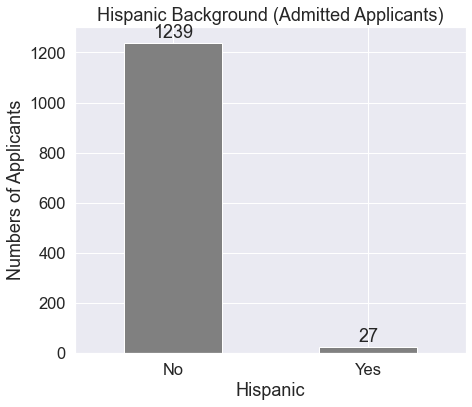

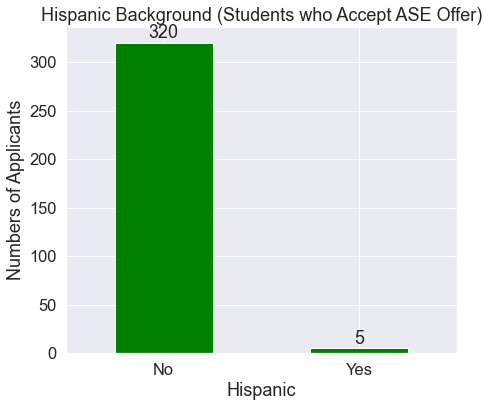

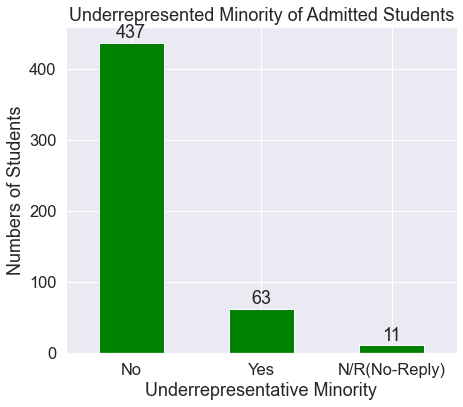

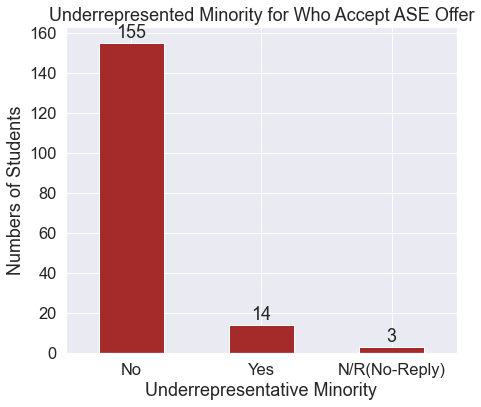

0
0


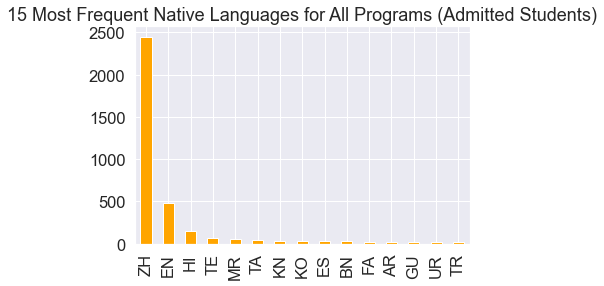

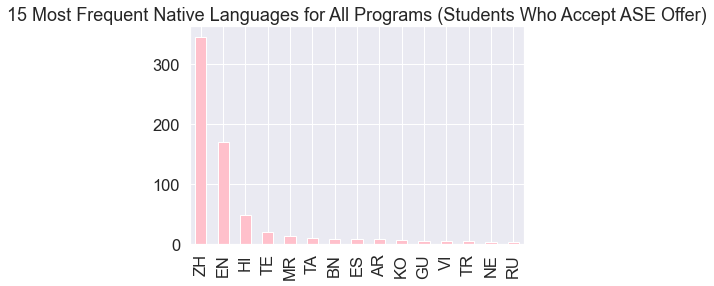

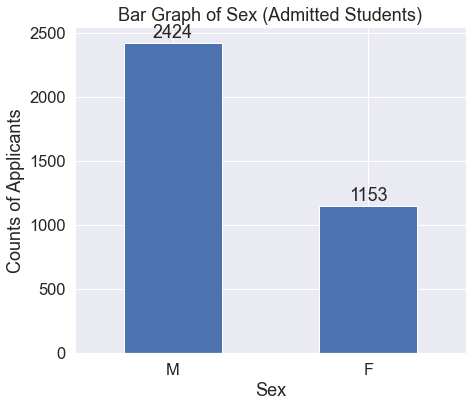

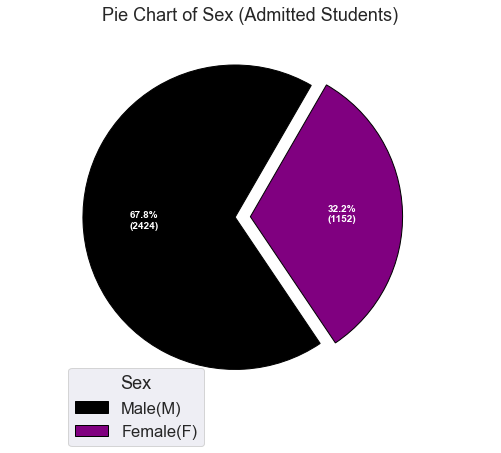

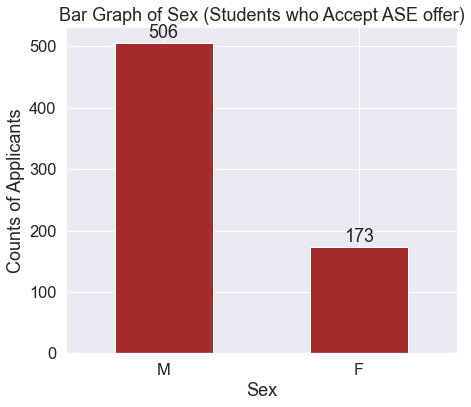

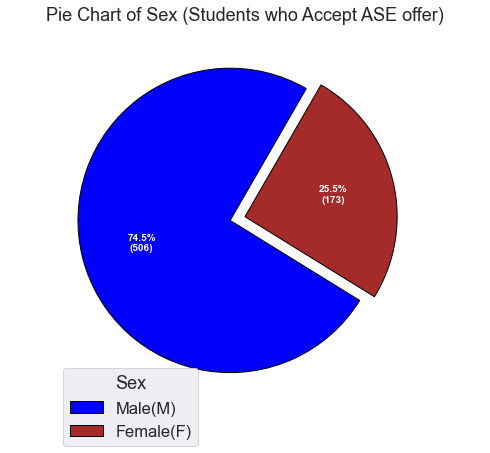

[nan 'White' 'Asian' 'Black or African American' 'Asian, White'
 'Asian, Black or African American, White' 'American Indian, White'
 'American Indian, Black or African American' 'Asian, Islander'
 'American Indian, Asian, White' 'American Indian'
 'Asian, Black or African American' 'American Indian, Asian']
2316
Asian                                         857
White                                         327
Black or African American                      48
Asian, White                                   16
American Indian, Black or African American      2
Asian, Islander                                 2
American Indian                                 2
Asian, Black or African American                2
American Indian, Asian                          2
Asian, Black or African American, White         1
American Indian, White                          1
American Indian, Asian, White                   1
Name: Race, dtype: int64
['White' nan 'Asian' 'Black or African American' 'Asian, Whit

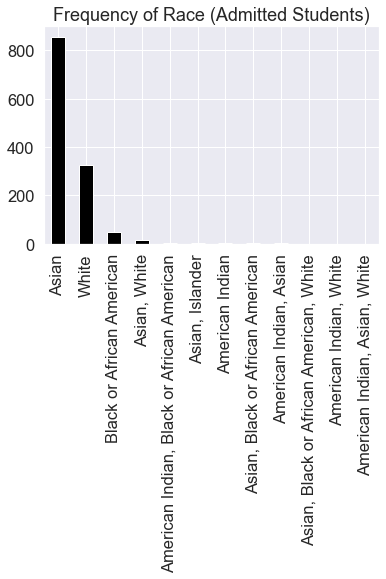

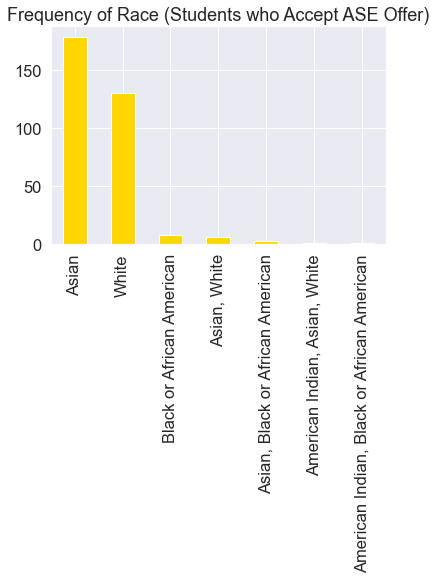

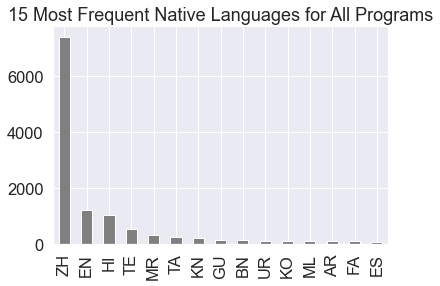

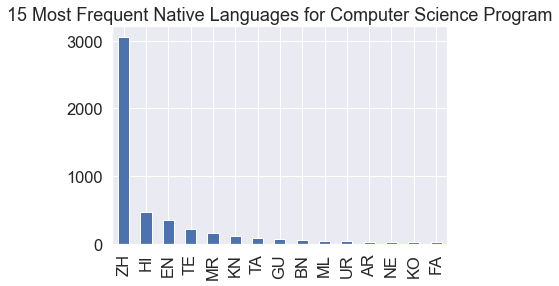

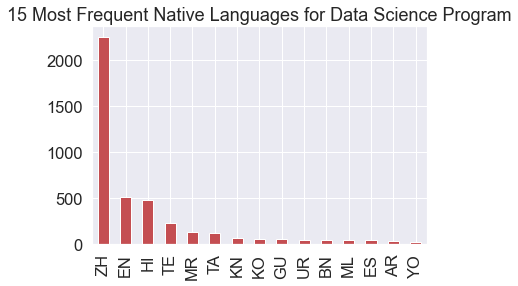

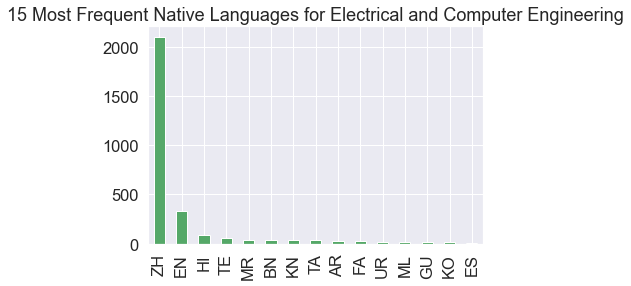

In [17]:
### Hispanic

# plot Hispanic for admitted students
gender = df_admitted['Hispanic'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='grey')
ax.set_title("Hispanic Background (Admitted Applicants)", y = 1)
ax.set_xlabel('Hispanic')
ax.set_ylabel('Numbers of Applicants')
ax.set_xticklabels(('No', 'Yes'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

# plot Hispanic for students who accepted 
gender = df_accept['Hispanic'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='green')
ax.set_title("Hispanic Background (Students who Accept ASE Offer)", y = 1)
ax.set_xlabel('Hispanic')
ax.set_ylabel('Numbers of Applicants')
ax.set_xticklabels(('No', 'Yes'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

### URM

# select those who get admitted
df_admitted = df_decision[df_decision['UR_Decision']== 'Admit']

# plot underrepresented minority for those who get admitted
gender = df_admitted['URM'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='green')
ax.set_title("Underrepresented Minority of Admitted Students", y = 1)
ax.set_xlabel('Underrepresentative Minority')
ax.set_ylabel('Numbers of Students')
ax.set_xticklabels(('No','Yes','N/R(No-Reply)'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()


df_accept = df_decision[df_decision['Applicant_Decision']== 'Accept']

# plot underrepresented minority for those who accepted
gender = df_accept['URM'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='brown')
ax.set_title("Underrepresented Minority for Who Accept ASE Offer", y = 1)
ax.set_xlabel('Underrepresentative Minority')
ax.set_ylabel('Numbers of Students')
ax.set_xticklabels(('No','Yes','N/R(No-Reply)'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()



### Native Language

# check total, missing and available data in admitted students
df_admitted['Native Language'].isnull().sum()
df_admitted['Native Language'].nunique() 

fig, ax = plt.subplots()
new_native = df_admitted['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for All Programs (Admitted Students)', color='orange')




# check total, missing and available data in students who accept offer
print(df_accept['Native Language'].isnull().sum())

df_accept['Native Language'].nunique() 

fig, ax = plt.subplots()
new_native = df_accept['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for All Programs (Students Who Accept ASE Offer)', color='pink')


# number of students who accept offer (languages of india)
48+20+12+10+8+5

### Sex
print(df_admitted['Sex'].isnull().sum())

# plot sex for admitted students
gender = df_admitted['Sex'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='b')
ax.set_title("Bar Graph of Sex (Admitted Students)", y = 1)
ax.set_xlabel('Sex')
ax.set_ylabel('Counts of Applicants')
ax.set_xticklabels(('M', 'F'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

# plot pie chart
Sex = ['Male(M)', 'Female(F)']
data = [2424, 1153]
explode = (0.1, 0.0)
colors = ( "black", "purple")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Sex,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
ax.legend(wedges, Sex,
          title ="Sex",
          loc ="center left",
          bbox_to_anchor =(0, 0, 0, 0))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Pie Chart of Sex (Admitted Students)")
 
# show plot
plt.show()

# plot sex for students who accept offer
gender = df_accept['Sex'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color='brown')
ax.set_title("Bar Graph of Sex (Students who Accept ASE offer)", y = 1)
ax.set_xlabel('Sex')
ax.set_ylabel('Counts of Applicants')
ax.set_xticklabels(('M', 'F'))
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

173/506

# plot pie chart
Sex = ['Male(M)', 'Female(F)']
data = [506, 173]
explode = (0.1, 0.0)
colors = ( "blue", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Sex,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
ax.legend(wedges, Sex,
          title ="Sex",
          loc ="center left",
          bbox_to_anchor =(0, 0, 0, 0))
 
plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Pie Chart of Sex (Students who Accept ASE offer)")
 
# show plot
plt.show()

### Race

print(df_admitted['Race'].unique())
print(df_admitted['Race'].isnull().sum())
print(df_admitted['Race'].value_counts())

fig, ax = plt.subplots()
new_native = df_admitted['Race'].value_counts().nlargest(12)
nx= new_native.plot(ax=ax, kind='bar', title='Frequency of Race (Admitted Students)', color='black')

print(df_accept['Race'].unique())
print(df_accept['Race'].isnull().sum())
print(df_accept['Race'].value_counts())

fig, ax = plt.subplots()
new_native = df_accept['Race'].value_counts().nlargest(7)
nx= new_native.plot(ax=ax, kind='bar', title='Frequency of Race (Students who Accept ASE Offer)', color='gold')

df['Citizenship2'].unique()

df['Native Language'].nunique() 

# plot bar graph
fig, ax = plt.subplots()
new_native = df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for All Programs', color='grey')

co_df = df.loc[df['Program (ASE)'] == 'Computer Science']
fig, ax = plt.subplots()
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Computer Science Program', color='b')


co_df = df.loc[df['Program (ASE)'] == 'Data Science']
fig, ax = plt.subplots()
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Data Science Program', color='r')


co_df = df.loc[df['Program (ASE)'] == 'Electrical and Computer Engineering']
fig, ax = plt.subplots()
new_native = co_df['Native Language'].value_counts().nlargest(15)
nx= new_native.plot(ax=ax, kind='bar', title='15 Most Frequent Native Languages for Electrical and Computer Engineering', color='g')


### Extended anaysis on Sex 

#### Across programs

In [18]:
mod_df = df.dropna( how='any', subset=['Program (ASE)', 'Sex'])

In [19]:
# Sex grouped by programs (normalized)
male = mod_df[mod_df['Sex']=='M']
female = mod_df[mod_df['Sex']=='F']
male_check = mod_df[(mod_df['Sex']=='M')&(mod_df['Program (ASE)']=='Electrical and Computer Engineering')]
male_check=male_check['Sex']
male_check.describe()

count     2261
unique       1
top          M
freq      2261
Name: Sex, dtype: object

In [20]:
sex_type = []
for p in mod_df['Program (ASE)'].unique():
    data = mod_df[(mod_df['Program (ASE)']==p)]
    sex = []
    sex.append((data[data['Sex']=='M']).shape[0]/data.shape[0])
    sex.append(data[data['Sex']=='F'].shape[0]/data.shape[0])
    sex_type.append(sex)

In [21]:
x1 = [0,0.3]
x2 = [i+1.2 for i in x1]
x3 = [i+2.4 for i in x1]

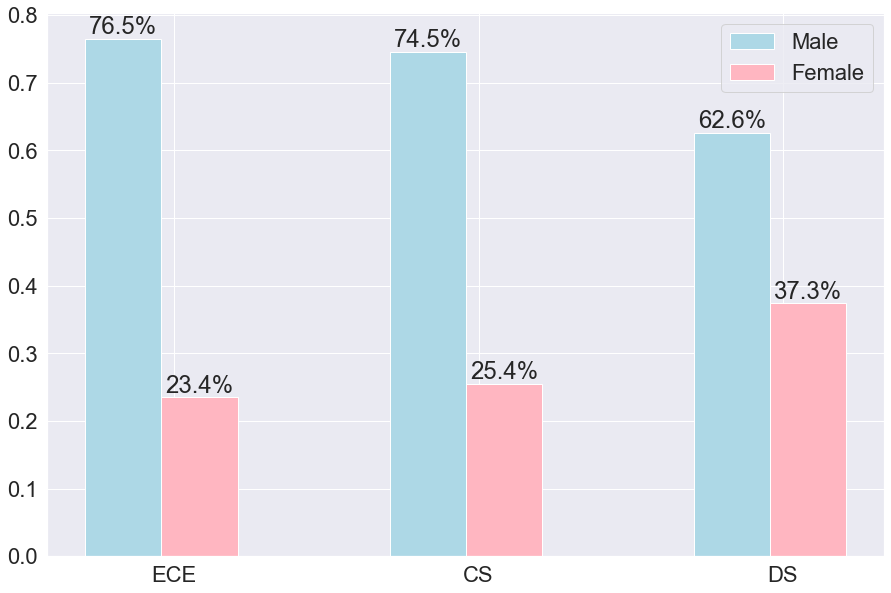

In [22]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
for i in range(3):
    plt.bar(i*1.2,sex_type[i][0],width=0.3,color='lightblue',label='Male')
    plt.bar(0.3+i*1.2,sex_type[i][1],width=0.3,color='lightpink',label='Female')
for a,b in zip(x1, sex_type[0]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x2, sex_type[1]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x3, sex_type[2]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
mid = [0.2,1.4,2.6]
plt.xticks(mid,['ECE','CS','DS'])
#plt.title("Sex Grouped by Three Programs")
plt.legend(['Male','Female'])
plt.savefig("./Fig/Sex Grouped by Three Programs.png", bbox_inches = 'tight')

#### Admitted vs Accepted students on Sex

In [23]:
mod_df_admitted = df_admitted.dropna( how='any', subset=['Program (ASE)', 'Sex'])

In [24]:
sex_type = []
for p in mod_df_admitted['Program (ASE)'].unique():
    data = mod_df_admitted[(mod_df_admitted['Program (ASE)']==p)]
    sex = []
    sex.append((data[data['Sex']=='M']).shape[0]/data.shape[0])
    sex.append(data[data['Sex']=='F'].shape[0]/data.shape[0])
    sex_type.append(sex)

In [25]:
x1 = [0,0.3]
x2 = [i+1.2 for i in x1]
x3 = [i+2.4 for i in x1]

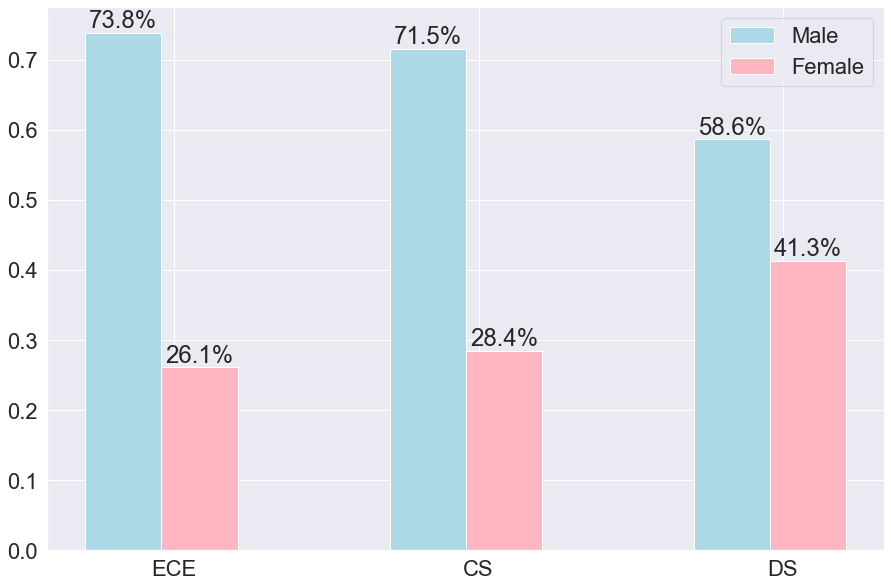

In [26]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
for i in range(3):
    plt.bar(i*1.2,sex_type[i][0],width=0.3,color='lightblue',label='Male')
    plt.bar(0.3+i*1.2,sex_type[i][1],width=0.3,color='lightpink',label='Female')
for a,b in zip(x1, sex_type[0]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x2, sex_type[1]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x3, sex_type[2]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
mid = [0.2,1.4,2.6]
plt.xticks(mid,['ECE','CS','DS'])
#plt.title("Sex of Admitted Students Grouped by Three Programs")
plt.legend(['Male','Female'])
plt.savefig("./Fig/Sex of Admitted Students Grouped by Three Programs.png", bbox_inches = 'tight')

In [27]:
mod_df_accept = df_accept.dropna( how='any', subset=['Program (ASE)', 'Sex'])

In [28]:
sex_type = []
for p in mod_df_accept['Program (ASE)'].unique():
    data = mod_df_accept[(mod_df_accept['Program (ASE)']==p)]
    sex = []
    sex.append((data[data['Sex']=='M']).shape[0]/data.shape[0])
    sex.append(data[data['Sex']=='F'].shape[0]/data.shape[0])
    sex_type.append(sex)

In [29]:
x1 = [0,0.3]
x2 = [i+1.2 for i in x1]
x3 = [i+2.4 for i in x1]

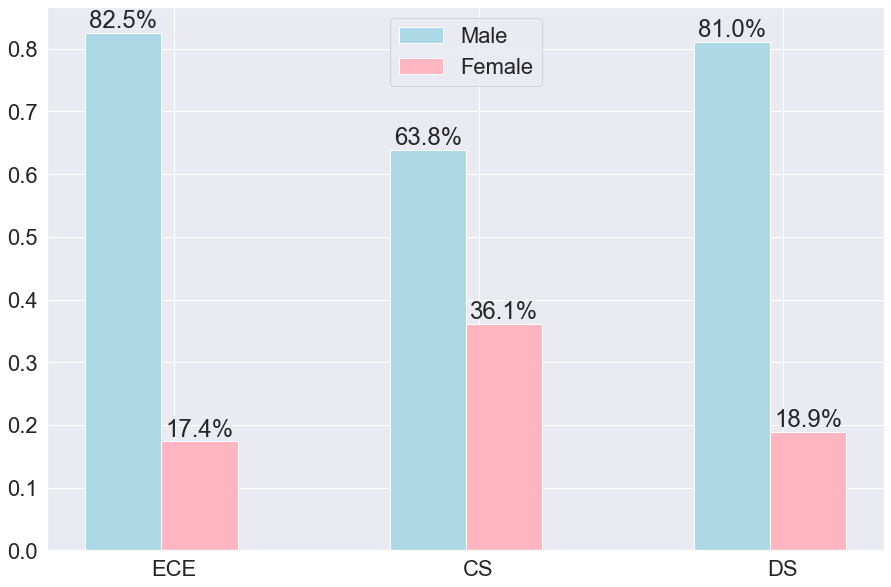

In [30]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
for i in range(3):
    plt.bar(i*1.2,sex_type[i][0],width=0.3,color='lightblue',label='Male')
    plt.bar(0.3+i*1.2,sex_type[i][1],width=0.3,color='lightpink',label='Female')
for a,b in zip(x1, sex_type[0]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x2, sex_type[1]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x3, sex_type[2]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
mid = [0.2,1.4,2.6]
plt.xticks(mid,['ECE','CS','DS'])
#plt.title("Sex of Students who Accepted Offer Grouped by Three Programs")
plt.legend(['Male','Female'])
plt.savefig("./Fig/Sex of Students who Accepted Offer Grouped by Three Programs.png", bbox_inches = 'tight')

#### Sex across times

##### Female

In [31]:
# data for each year
mod_df = df.dropna( how='any', subset=['Program (ASE)', 'Sex'])
df_2015 = mod_df[(mod_df['Entry Term']=='Fall 2015')|(mod_df['Entry Term']=='Spring 2015')|(mod_df['Entry Term']=='Summer 2015')]
df_2016 = mod_df[(mod_df['Entry Term']=='Fall 2016')|(mod_df['Entry Term']=='Spring 2016')|(mod_df['Entry Term']=='Summer 2016')]
df_2017 = mod_df[(mod_df['Entry Term']=='Fall 2017')|(mod_df['Entry Term']=='Spring 2017')|(mod_df['Entry Term']=='Summer 2017')]
df_2018 = mod_df[(mod_df['Entry Term']=='Fall 2018')|(mod_df['Entry Term']=='Spring 2018')|(mod_df['Entry Term']=='Summer 2018')]
df_2019 = mod_df[(mod_df['Entry Term']=='Fall 2019')|(mod_df['Entry Term']=='Spring 2019')|(mod_df['Entry Term']=='Summer 2019')]
df_2020 = mod_df[(mod_df['Entry Term']=='Fall 2020')|(mod_df['Entry Term']=='Spring 2020')|(mod_df['Entry Term']=='Summer 2020')]
df_2021 = mod_df[(mod_df['Entry Term']=='Fall 2021')|(mod_df['Entry Term']=='Spring 2021')|(mod_df['Entry Term']=='Summer 2021')]

In [32]:
ece_fnum = []
cs_fnum = []
ds_fnum = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    ece_data = data[(data['Sex']=='F')&(data['Program (ASE)']=='Electrical and Computer Engineering')]
    cs_data = data[(data['Sex']=='F')&(data['Program (ASE)']=='Computer Science')]
    ds_data = data[(data['Sex']=='F')&(data['Program (ASE)']=='Data Science')]
    
    ece_fnum.append((ece_data[ece_data['Sex']=='F']).shape[0]/data.shape[0])
    cs_fnum.append((cs_data[cs_data['Sex']=='F']).shape[0]/data.shape[0])
    ds_fnum.append((ds_data[ds_data['Sex']=='F']).shape[0]/data.shape[0])
year = [i for i in range(2015,2022)]

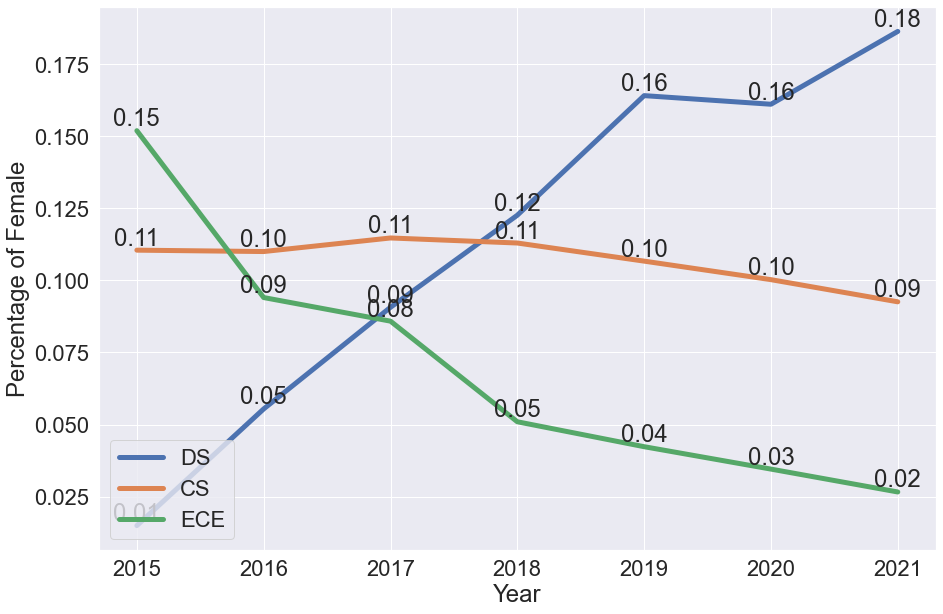

In [33]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.plot(year,ds_fnum,label='DS', linewidth=5)
plt.plot(year,cs_fnum,label='CS', linewidth=5)
plt.plot(year,ece_fnum,label='ECE', linewidth=5)

plt.xlabel("Year")
plt.ylabel("Percentage of Female")
for a,b in zip(year, ece_fnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, cs_fnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, ds_fnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')

#plt.title("Percentage of Female across Years")
plt.legend(loc='lower left')
plt.savefig("./Fig/Percentage of Female across Years.png", bbox_inches = 'tight')

##### Male

In [34]:
ece_mnum = []
cs_mnum = []
ds_mnum = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    ece_data = data[(data['Sex']=='M')&(data['Program (ASE)']=='Electrical and Computer Engineering')]
    cs_data = data[(data['Sex']=='M')&(data['Program (ASE)']=='Computer Science')]
    ds_data = data[(data['Sex']=='M')&(data['Program (ASE)']=='Data Science')]
    
    ece_mnum.append((ece_data[ece_data['Sex']=='M']).shape[0]/data.shape[0])
    cs_mnum.append((cs_data[cs_data['Sex']=='M']).shape[0]/data.shape[0])
    ds_mnum.append((ds_data[ds_data['Sex']=='M']).shape[0]/data.shape[0])
year = [i for i in range(2015,2022)]

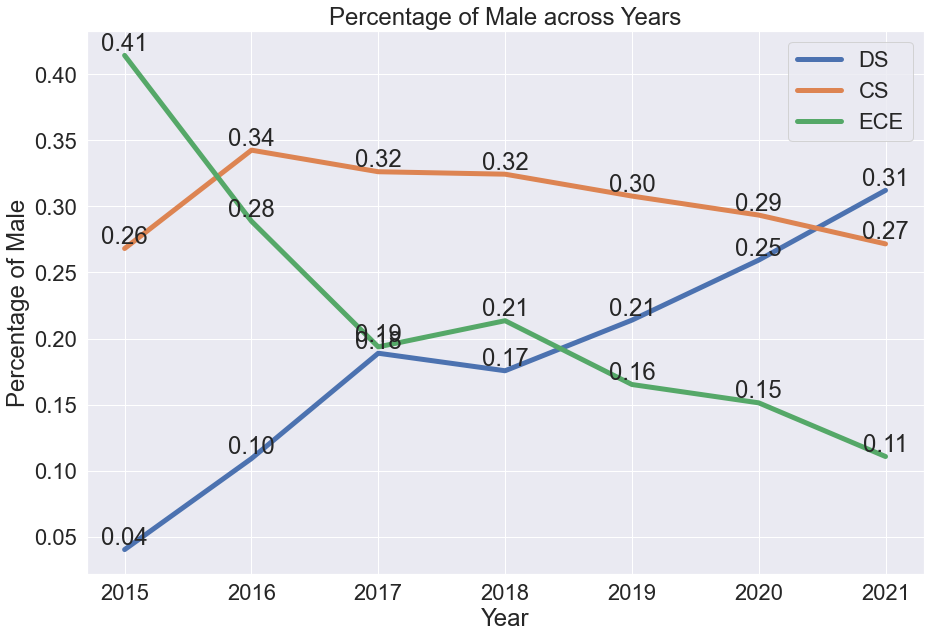

In [35]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.plot(year,ds_mnum,label='DS', linewidth=5)
plt.plot(year,cs_mnum,label='CS', linewidth=5)
plt.plot(year,ece_mnum,label='ECE', linewidth=5)

plt.xlabel("Year")
plt.ylabel("Percentage of Male")
for a,b in zip(year, ece_mnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, cs_mnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, ds_mnum):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
plt.title("Percentage of Male across Years")
plt.legend(loc='upper right')

### Extended analysis on URM

#### URM and GPA

In [36]:
# data for each year
mod_df = df.dropna( how='any', subset=['Program (ASE)', 'URM', 'Institution 1 GPA (4.0 Scale)'])
df_2015 = mod_df[(mod_df['Entry Term']=='Fall 2015')|(mod_df['Entry Term']=='Spring 2015')|(mod_df['Entry Term']=='Summer 2015')]
df_2016 = mod_df[(mod_df['Entry Term']=='Fall 2016')|(mod_df['Entry Term']=='Spring 2016')|(mod_df['Entry Term']=='Summer 2016')]
df_2017 = mod_df[(mod_df['Entry Term']=='Fall 2017')|(mod_df['Entry Term']=='Spring 2017')|(mod_df['Entry Term']=='Summer 2017')]
df_2018 = mod_df[(mod_df['Entry Term']=='Fall 2018')|(mod_df['Entry Term']=='Spring 2018')|(mod_df['Entry Term']=='Summer 2018')]
df_2019 = mod_df[(mod_df['Entry Term']=='Fall 2019')|(mod_df['Entry Term']=='Spring 2019')|(mod_df['Entry Term']=='Summer 2019')]
df_2020 = mod_df[(mod_df['Entry Term']=='Fall 2020')|(mod_df['Entry Term']=='Spring 2020')|(mod_df['Entry Term']=='Summer 2020')]
df_2021 = mod_df[(mod_df['Entry Term']=='Fall 2021')|(mod_df['Entry Term']=='Spring 2021')|(mod_df['Entry Term']=='Summer 2021')]

In [37]:
year = [i for i in range(2015,2022)]

In [38]:
a = df_2021[(df_2021['URM']=='Yes')&(df_2021['Program (ASE)']=='Electrical and Computer Engineering')]
a['Institution 1 GPA (4.0 Scale)']

12802    2.62
16507    4.00
Name: Institution 1 GPA (4.0 Scale), dtype: float64

In [39]:
ece_score = []
cs_score = []
ds_score = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    ece_data = data[(data['URM']=='Yes')&(data['Program (ASE)']=='Electrical and Computer Engineering')]
    cs_data = data[(data['URM']=='Yes')&(data['Program (ASE)']=='Computer Science')]
    ds_data = data[(data['URM']=='Yes')&(data['Program (ASE)']=='Data Science')]
    
    ece_score.append(np.mean(ece_data['Institution 1 GPA (4.0 Scale)']))
    cs_score.append(np.mean(cs_data['Institution 1 GPA (4.0 Scale)']))
    ds_score.append(np.mean(ds_data['Institution 1 GPA (4.0 Scale)']))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


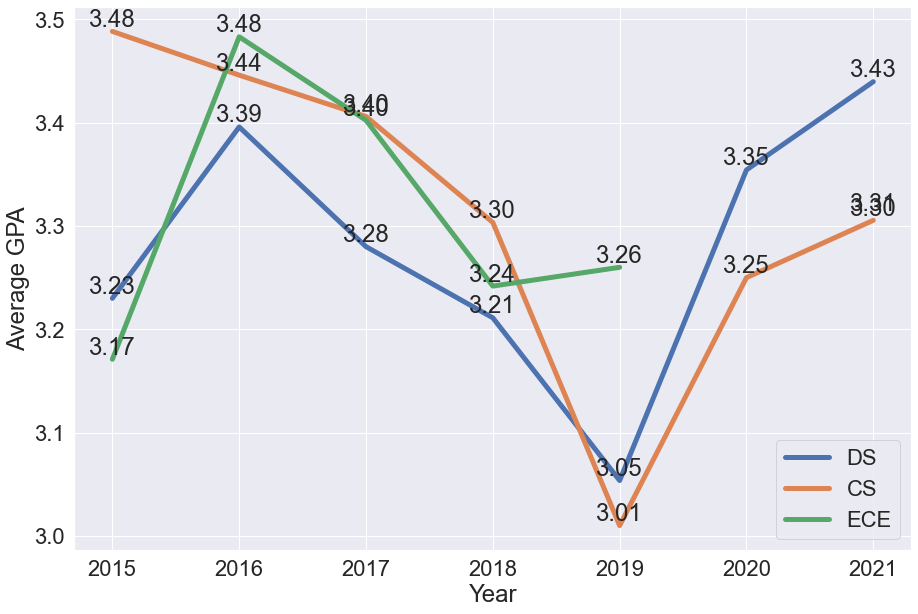

In [40]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.plot(year,ds_score,label='DS', linewidth=5)
plt.plot(year,cs_score,label='CS', linewidth=5)
plt.plot(year,ece_score,label='ECE', linewidth=5)

plt.xlabel("Year")
plt.ylabel("Average GPA")
for a,b in zip(year, ece_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, cs_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, ds_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')

#plt.title("Average GPA score of Underrepresented Minority across Three Programs")
plt.legend(loc='lower right')
plt.savefig("./Fig/Average GPA score of Underrepresented Minority across Three Programs.png", bbox_inches = 'tight')

#### URM and Birth State

In [41]:
mod_df = df[(df['URM']=='Yes')]
urm_birth = mod_df['Birth State'].value_counts().rename_axis('Birth State').reset_index(name='Counts')[:7]

In [42]:
def show_values(axs, orient="v", space=.08):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = str(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

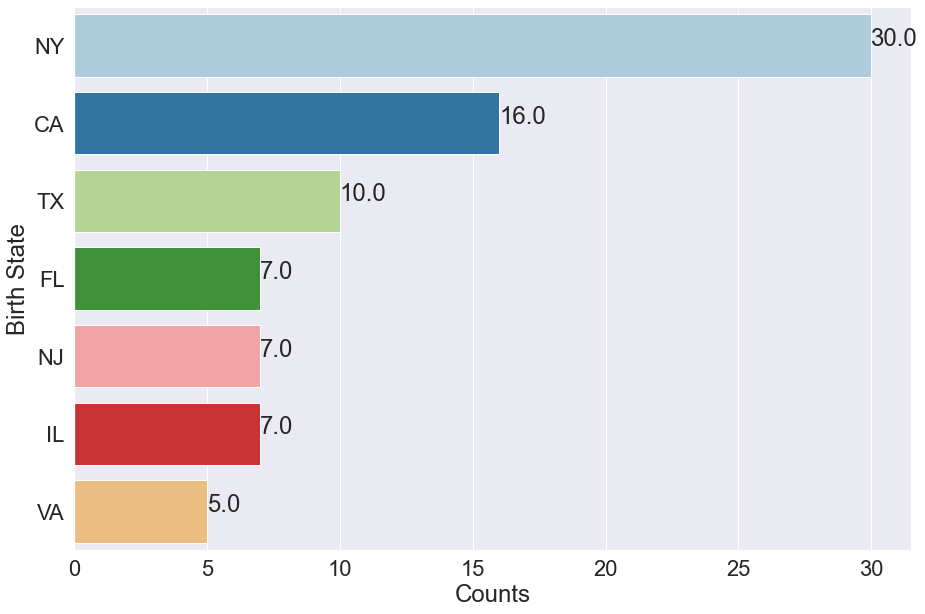

In [43]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
u = sns.barplot(x='Counts', y='Birth State', data=urm_birth, palette = 'Paired')
#plt.title("Top Birth States where Underrepresented Students Come from")
show_values(u,'h',space=-0)
plt.savefig("./Fig/Top Birth States where Underrepresented Students Come from.png", bbox_inches = 'tight')

#### URM and "Institution 1 Location"/"Institution 1 Name"

In [44]:
mod_df = df[(df['URM']=='Yes')]
urm_institution = mod_df['Institution 1 Name'].value_counts().rename_axis('Post-Secondary Institution').reset_index(name='Counts')[:7]

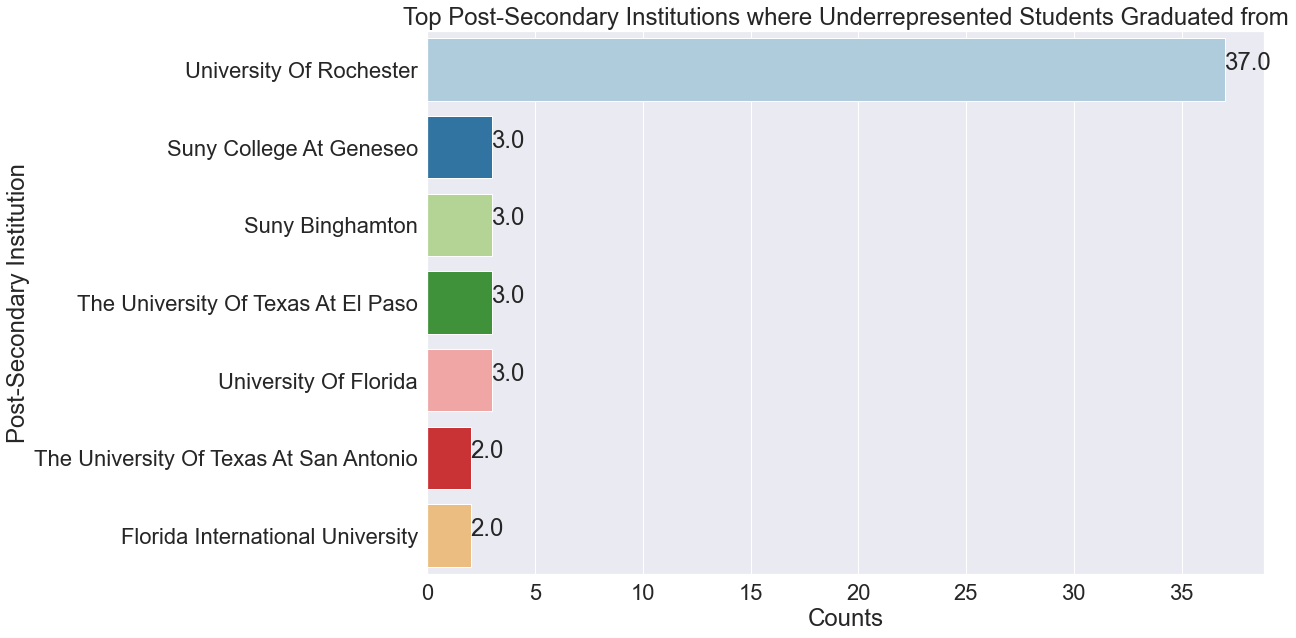

In [45]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
u = sns.barplot(x='Counts', y='Post-Secondary Institution', data=urm_institution, palette = 'Paired')
plt.title("Top Post-Secondary Institutions where Underrepresented Students Graduated from")
show_values(u,'h',space=0)

### Extended analysis on Hispanic

In [46]:
mod_df = df[(df['Hispanic']=='Y')]
Hispanic_birth = mod_df['Birth State'].value_counts().rename_axis('Birth State').reset_index(name='Counts')[:7]

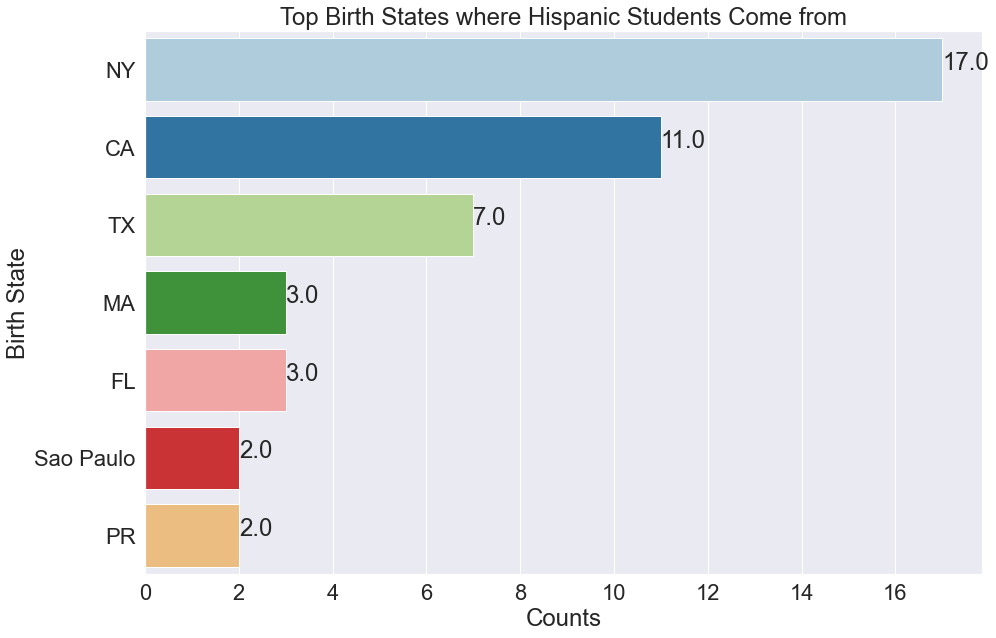

In [47]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
u = sns.barplot(x='Counts', y='Birth State', data=Hispanic_birth, palette = 'Paired')
plt.title("Top Birth States where Hispanic Students Come from")
show_values(u,'h',space=-0)

In [48]:
Hispanic_institution = mod_df['Institution 1 Name'].value_counts().rename_axis('Post-Secondary Institution').reset_index(name='Counts')[:7]

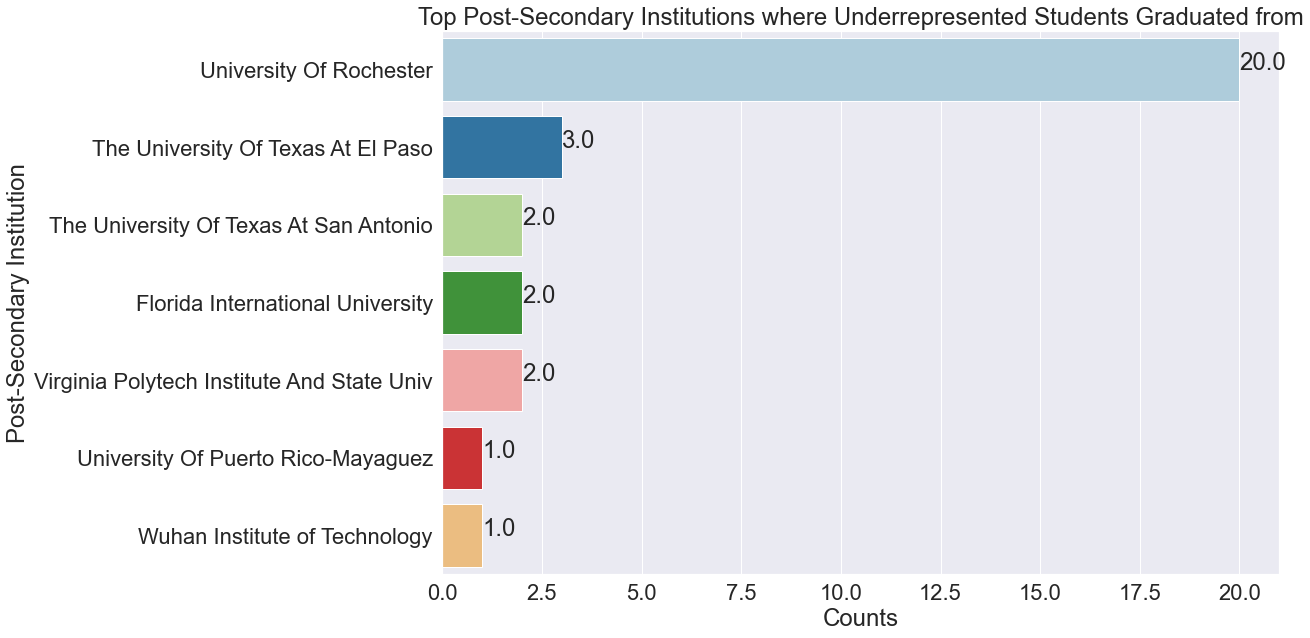

In [49]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
u = sns.barplot(x='Counts', y='Post-Secondary Institution', data=Hispanic_institution, palette = 'Paired')
plt.title("Top Post-Secondary Institutions where Underrepresented Students Graduated from")
show_values(u,'h',space=0)

## Session 2

In [50]:

df = df[df['Degree']=='Master\'s']
df = df[df['Time Status']=='Full Time']
df = df[df['Entry Term']!='Fall 2022']
df = df[df['Entry Term']!='Fall 2023']
df = df[df['Entry Term']!='Spring 2022']
df = df[df['Entry Term']!='Spring 2023']
df = df[df['Entry Term']!='Summer 2022']
df = df[df['Entry Term']!='Summer 2023']
df = df[~df['Decision 1'].isnull()]

In [51]:
def urdecision(d1):
    if 'Admit' in d1:
        return 'Admit'
    elif 'Withdraw' in d1:
        return ''
    else:
        return 'Reject'

In [52]:
def applicant_decision(d1,d2,d4):
    if d4=='':
        return 'Withdraw'
    elif d4=='Reject':
        return ''
    else:
        if d1=='Admit/Accept Offer' and d2=='Admit':
            return 'Accept'
        elif d1=='Admit/Defer':
            return 'Defer'
        elif d1=='Admit/Accept/Melt':
            return 'Melt'
        else:
            return 'Decline'

In [53]:
df['UR_Decision'] = df['Decision 1'].apply(urdecision)
df['Applicant_Decision'] = df.apply(lambda x: applicant_decision(x['Decision 1'],x['Decision 2'],x['UR_Decision'])
                                    ,axis=1)

In [54]:
df_2015 = df[(df['Entry Term']=='Fall 2015')|(df['Entry Term']=='Spring 2015')|(df['Entry Term']=='Summer 2015')]
df_2016 = df[(df['Entry Term']=='Fall 2016')|(df['Entry Term']=='Spring 2016')|(df['Entry Term']=='Summer 2016')]
df_2017 = df[(df['Entry Term']=='Fall 2017')|(df['Entry Term']=='Spring 2017')|(df['Entry Term']=='Summer 2017')]
df_2018 = df[(df['Entry Term']=='Fall 2018')|(df['Entry Term']=='Spring 2018')|(df['Entry Term']=='Summer 2018')]
df_2019 = df[(df['Entry Term']=='Fall 2019')|(df['Entry Term']=='Spring 2019')|(df['Entry Term']=='Summer 2019')]
df_2020 = df[(df['Entry Term']=='Fall 2020')|(df['Entry Term']=='Spring 2020')|(df['Entry Term']=='Summer 2020')]
df_2021 = df[(df['Entry Term']=='Fall 2021')|(df['Entry Term']=='Spring 2021')|(df['Entry Term']=='Summer 2021')]

1. General Trend

In [55]:
Admit = []
Accept = []
total = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    admit = accept = decline = 0
    x = list(data['UR_Decision'])
    y = list(data['Applicant_Decision'])
    for j in range(data.shape[0]):
        if x[j]=='Admit':
            admit += 1
            if y[j]=='Accept':
                accept += 1
    Admit.append(admit)
    Accept.append(accept)
    total.append(data.shape[0])

In [56]:
admit_rate = []
accept_rate = []
decline_rate = []
for i in range(len(total)):
    admit_rate.append(Admit[i]/total[i])
    accept_rate.append(Accept[i]/Admit[i])

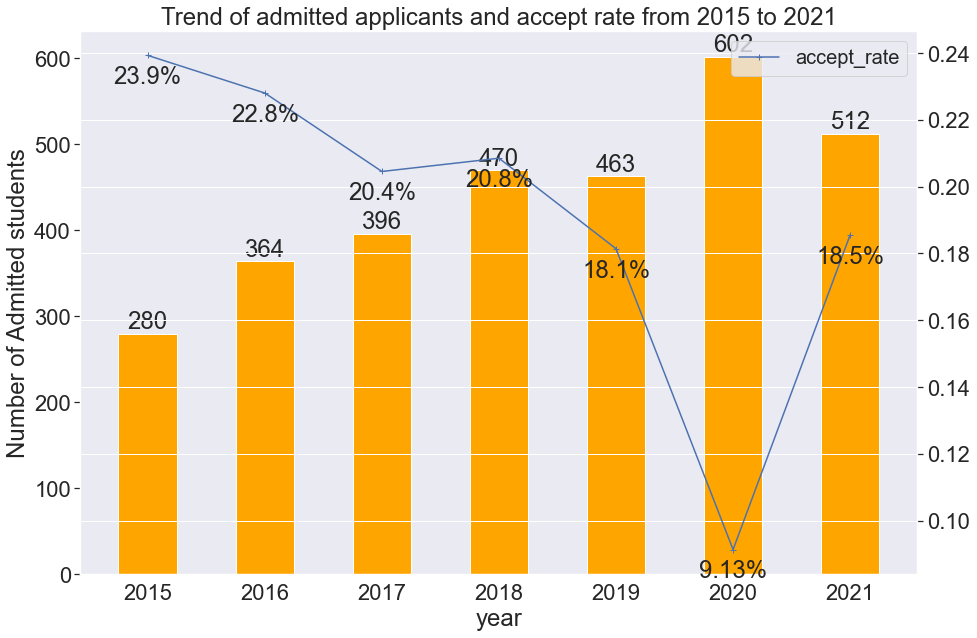

In [57]:
sns.set(font_scale=2)
year = [i for i in range(2015,2022)]
figure,ax1 = plt.subplots(figsize=(15,10))
ax1.bar(year,Admit,width=0.5,color='orange')
ax1.set_title('Trend of admitted applicants and accept rate from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Number of Admitted students")
ax1.grid(False)
for a,b in zip(year,Admit):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
ax2.plot(year,accept_rate,marker='+',color='b',label='accept_rate')

for a,b in zip(year, accept_rate):
    ax2.text(a,b-0.01,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
ax2.legend(fontsize=20)    
plt.show()
#plt.savefig('./accept_rate_general.png')

In [58]:
program_decision = [[],[],[]]

for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    for j in range(3):
        p = list(df['Program (ASE)'].unique())[j]
        program = data[data['Program (ASE)']==p]
        program_decision[j].append(program[program['UR_Decision']=='Admit'].shape[0]/program.shape[0])

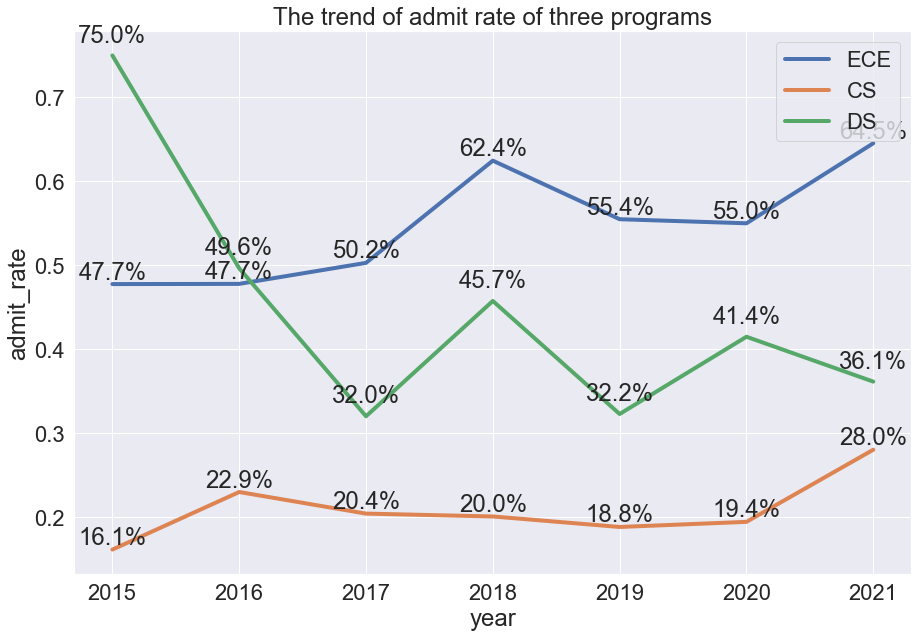

In [59]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.plot(year,program_decision[0],label='ECE',linewidth=4)
plt.plot(year,program_decision[1],label='CS',linewidth=4)
plt.plot(year,program_decision[2],label='DS',linewidth=4)

plt.xlabel("year")
plt.ylabel("admit_rate")
for a,b in zip(year, program_decision[0]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom')
for a,b in zip(year,program_decision[1]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom')
for a,b in zip(year, program_decision[2]):
    plt.text(a,b+0.01,
             str((b)*100)[:4]+'%',
             ha='center', 
             va='bottom')

plt.title("The trend of admit rate of three programs")
plt.legend()
plt.savefig("./admit rate across three programs")

2. Citizenship

In [60]:
df_ece = df[(df['Program (ASE)']=='Electrical and Computer Engineering')&(df['UR_Decision']=='Admit')]
df_cs = df[(df['Program (ASE)']=='Computer Science')&(df['UR_Decision']=='Admit')]
df_ds = df[(df['Program (ASE)']=='Data Science')&(df['UR_Decision']=='Admit')]

In [61]:
dic_ece = {}
for i in df_ece['Citizenship1']:
    if i not in dic_ece:
        dic_ece[i] = 1
    else:
        dic_ece[i] += 1
dic_ece = sorted(dic_ece.items(),key=lambda x:x[1], reverse=True)

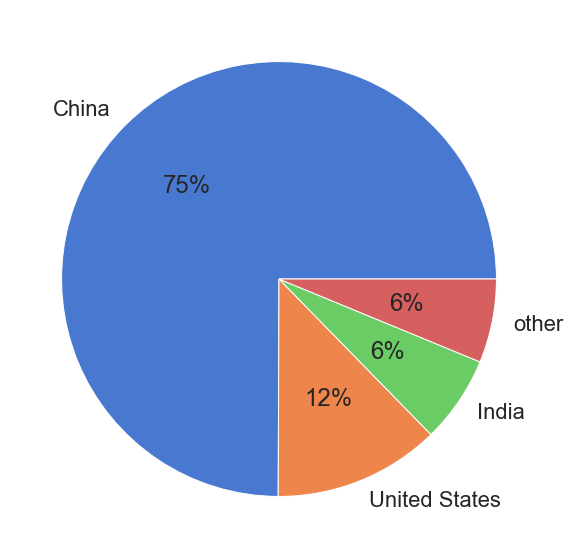

In [62]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
area = [x[0] for x in dic_ece[:3]]+['other']
num = [x[1] for x in dic_ece[:3]]
main = sum(num)
num += [df_ece.shape[0]-main]
palette_color = sns.color_palette('muted')
plt.pie(num, labels=area, colors=palette_color, autopct='%.0f%%')
#plt.title("The area distribution of admitted students in ECE program")
plt.savefig("./Fig/ece_admit.png", bbox_inches = 'tight')

In [63]:
dic_cs = {}
for i in df_cs['Citizenship1']:
    if i not in dic_cs:
        dic_cs[i] = 1
    else:
        dic_cs[i] += 1
dic_cs = sorted(dic_cs.items(),key=lambda x:x[1], reverse=True)

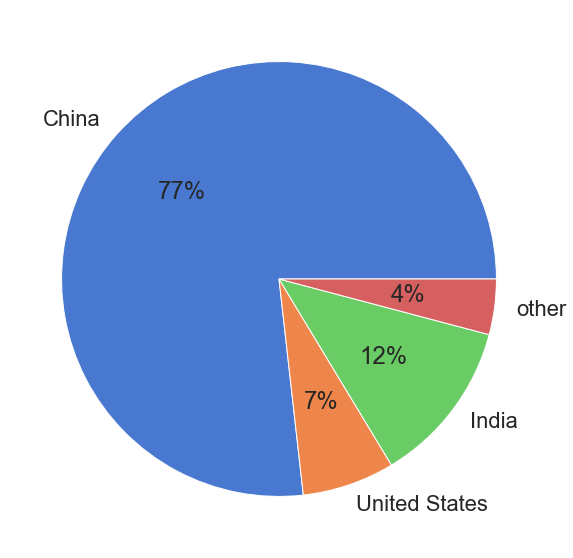

In [64]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
area = [x[0] for x in dic_cs[:3]]+['other']
num = [x[1] for x in dic_cs[:3]]
new_num = num
new_num[1],new_num[2] = new_num[2],new_num[1]
new_area = area
new_area[1],new_area[2] = new_area[2],new_area[1]
main = sum(num)
num += [df_cs.shape[0]-main]
palette_color = sns.color_palette('muted')
plt.pie(new_num, labels=new_area, colors=palette_color, autopct='%.0f%%')
plt.savefig("./Fig/cs_admit.png", bbox_inches = 'tight')
#plt.savefig('./CS_admitted_three countries.png')

In [65]:
dic_ds = {}
for i in df_ds['Citizenship1']:
    if i not in dic_ds:
        dic_ds[i] = 1
    else:
        dic_ds[i] += 1
dic_ds = sorted(dic_ds.items(),key=lambda x:x[1], reverse=True)

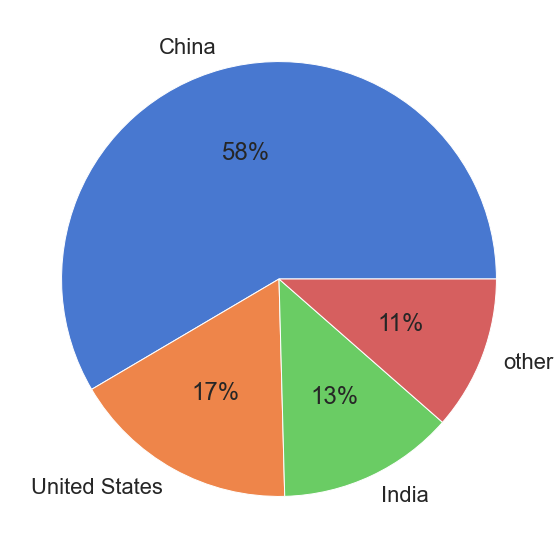

In [66]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
area = [x[0] for x in dic_ds[:3]]+['other']
num = [x[1] for x in dic_ds[:3]]
main = sum(num)
num += [df_ds.shape[0]-main]
palette_color = sns.color_palette('muted')
plt.pie(num, labels=area, colors=palette_color, autopct='%.0f%%')
#plt.title("The area distribution of admitted students in DS program")
plt.savefig("./Fig/ds_admit.png", bbox_inches = 'tight')
#plt.savefig('./DS_admitted_three countries.png')

In [67]:
Asia = ['Nepal','Iran','Bangladesh','Taiwan','Pakistan','Saudi Arabia','South Korea',
        'Palestine','Kuwait','Philippines','Sri Lanka', 'Vietnam','Indonesia','Azerbaijan',
       'Japan','Armenia','Kazakhstan','Syria','Hong Kong S.A.R.','Singapore','Uzbekistan',
       'Israel','Lebanon']
Africa = ['Kenya','Rwanda','Egypt','Nigeria','Ghana','Algeria','Ethiopia','Swaziland',
         'Cameroon','Zimbabwe','South Africa','Uganda']
Europe = ['France','Spain','Turkey','Ukraine','Germany','Albania','Greece','Croatia','Russia',
         'Iceland','Belgium']
SouthAmerica = ['Venezuela','Chile','Argentina','Colombia','Peru','Brazil','Bolivia']
NorthAmerica = ['Canada','Haiti','Jamaica','Saint Lucia','Georgia','Panama','Costa Rica',
               'Mexico','Dominican Republic']

In [68]:
small_area = ['Asia','Africa','Europe','SouthAmerica','NorthAmerica']
small_count = [0]*5
small_area_df = df[~df['Citizenship1'].isin(['United States', 'China','India'])]
small_area_df = small_area_df[small_area_df['UR_Decision']=='Admit']

In [69]:
for i in list(small_area_df['Citizenship1']):
    if i in Asia:
        small_count[0] += 1
    elif i in Africa:
        small_count[1] += 1
    elif i in Europe:
        small_count[2] += 1
    elif i in SouthAmerica:
        small_count[3] += 1
    elif i in NorthAmerica:
        small_count[4] += 1

(-1.2252858308404595,
 1.3914509168410825,
 -1.1037520939029333,
 1.2135030184132631)

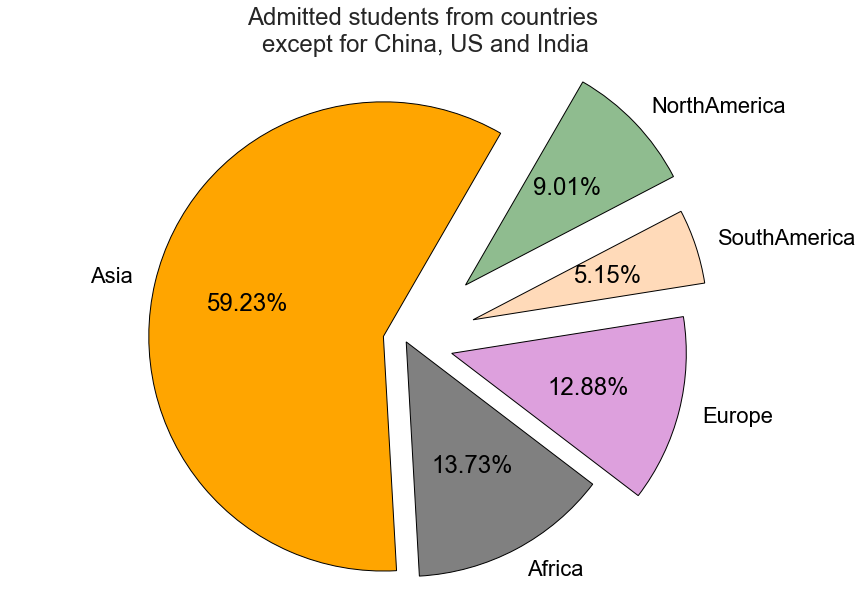

In [70]:
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
colors = ( "orange", "gray", "plum","peachpuff", "darkseagreen")
fig, ax = plt.subplots(figsize=(15,10))

explode = (0.1, 0.0, 0.2, 0.3, 0.35)
wedges, texts, autotexts = ax.pie(small_count,
                                  autopct = '%3.2f%%',
                                  explode = explode,
                                  labels = small_area,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  #alpha=0.5,
                                  textprops = dict(color ="black"))



 
#plt.setp(autotexts, weight ="bold")


#patches,text1,text2 = plt.pie(small_count,labels=small_area,autopct='%3.2f%%')
plt.title('Admitted students from countries \nexcept for China, US and India')
plt.axis('equal')
#plt.savefig('./admit small area.png')

In [71]:
other_country = {}
for i in list(small_area_df['Citizenship1']):
    if i not in other_country:
        other_country[i] = 1
    else:
      other_country[i] += 1
other_country = sorted(other_country.items(),key=lambda x:x[1], reverse=True)

In [72]:
small_area_table = pd.DataFrame()
small_area_table['country'] = [x[0] for x in other_country[:13]]
small_area_table['count'] = [x[1] for x in other_country[:13]]

In [73]:
small_area_table

country  count
0    South Korea     25
1         Taiwan     21
2           Iran     18
3       Pakistan     14
4         Canada     13
5         Turkey     11
6          Nepal     10
7     Bangladesh      9
8   Saudi Arabia      9
9        Vietnam      7
10      Ethiopia      6
11       Nigeria      6
12         Ghana      5

In [74]:
china_accept = df[(df['Applicant_Decision']=='Accept')&(df['Citizenship1']=='China')]
us_accept = df[(df['Applicant_Decision']=='Accept')&(df['Citizenship1']=='United States')]
india_accept = df[(df['Applicant_Decision']=='Accept')&(df['Citizenship1']=='India')]

In [75]:
china_accept_new = china_accept['Birth State'].value_counts().rename_axis('states').reset_index(name='counts')[:15]

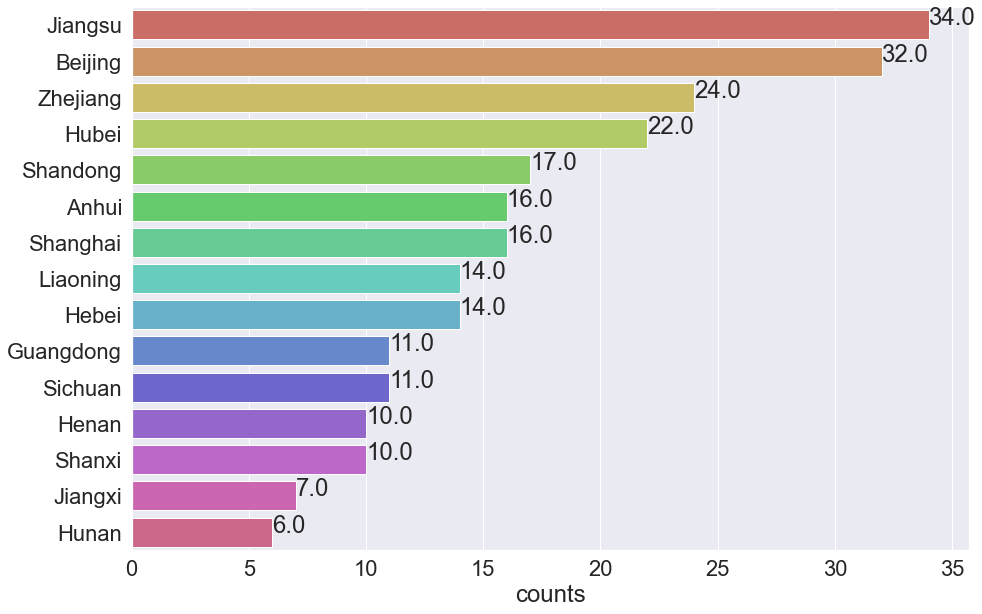

In [76]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
c = sns.barplot(x='counts', y='states', data=china_accept_new, palette = 'hls')
#plt.title("Top states where chinese students who accept offers are from")
show_values(c,'h',space=0)
c.set(ylabel=None)
plt.savefig('./Fig/china_state.png', bbox_inches = 'tight')

In [77]:
us_accept_new = us_accept['Birth State'].value_counts().rename_axis('states').reset_index(name='counts')[:7]

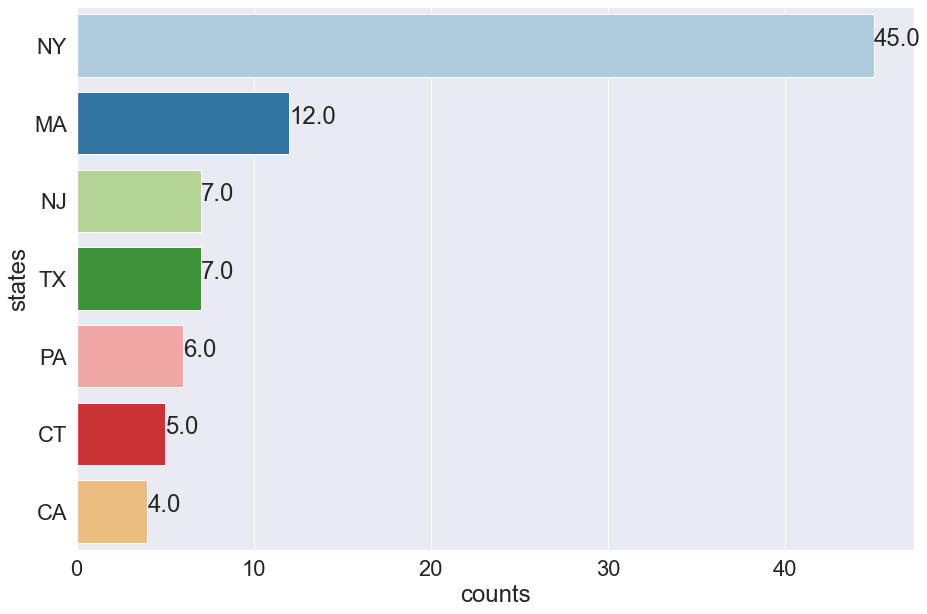

In [78]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
u = sns.barplot(x='counts', y='states', data=us_accept_new, palette = 'Paired')
#plt.title("Top states where United States students who accept offers are from")
show_values(u,'h',space=0)
#plt.savefig("./us_birth_state.png")

In [79]:
india_accept_new = india_accept['Birth State'].value_counts().rename_axis('states').reset_index(name='counts')[:8]

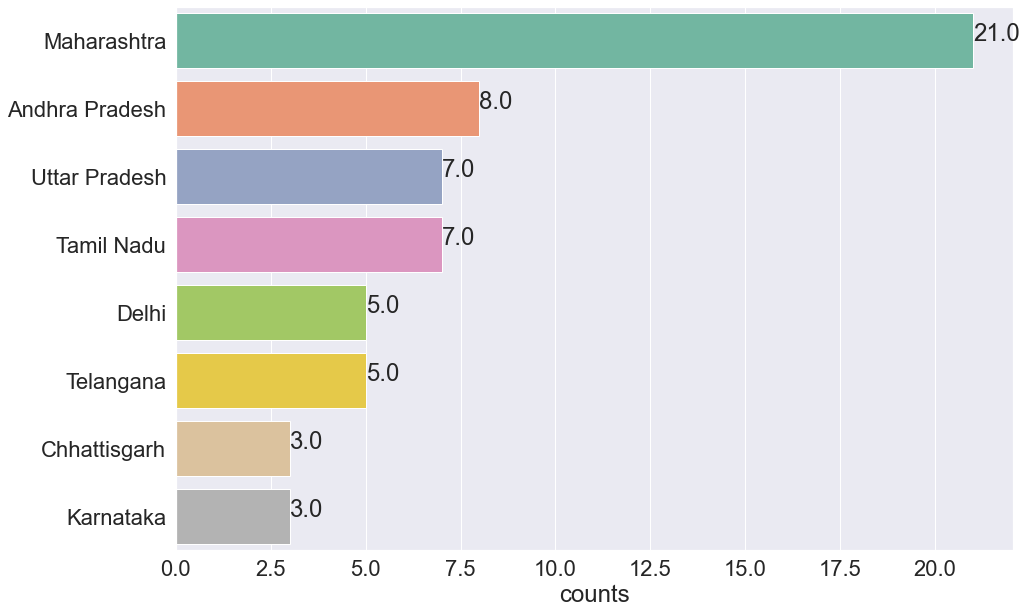

In [80]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
i = sns.barplot(x='counts', y='states', data=india_accept_new, palette = 'Set2')
#plt.title("Top states where Indian students who accept offers are from")
show_values(i,'h',space=0)
i.set(ylabel=None)
plt.savefig("./Fig/india_state.png", bbox_inches = 'tight')

3. Institution location

In [81]:
china_admit = df[(df['UR_Decision']=='Admit')&(df['Citizenship1']=='China')]

In [82]:
uslist = []
for i in list(china_admit['Institution 1 Location']):
    if len(str(i))==2 and i not in uslist:
        uslist.append(i)

In [83]:
loc_with_year = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    china_admit = data[(data['UR_Decision']=='Admit')&(data['Citizenship1']=='China')]
    loc = []
    loc.append(china_admit[china_admit['Institution 1 Location']=='China'].shape[0]/china_admit.shape[0])
    loc.append(china_admit[china_admit['Institution 1 Location'].isin(uslist)].shape[0]/china_admit.shape[0])
    loc_with_year.append(loc)

Text(0.5, 1.0, 'The percentage of institution location of admitted Chinese students')

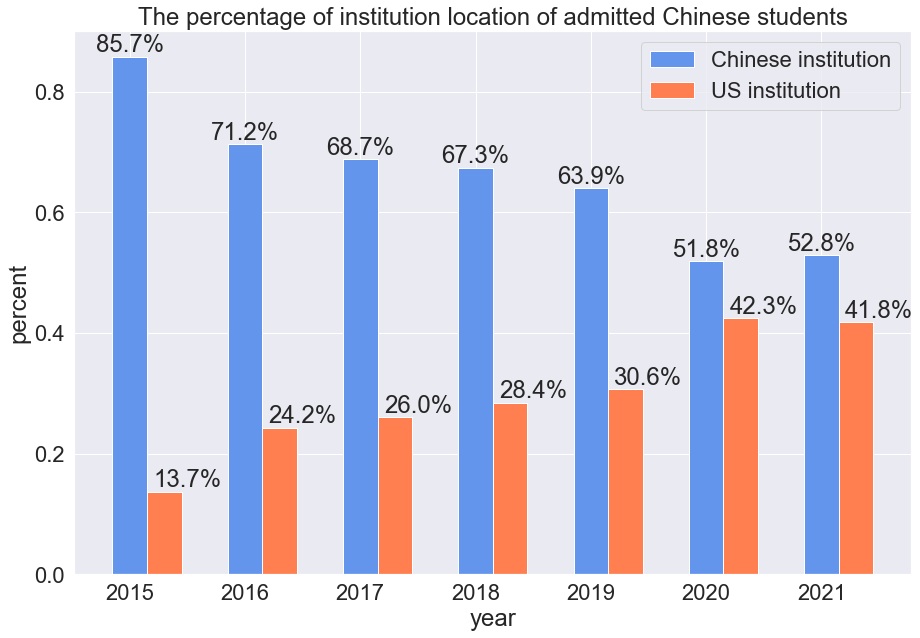

In [84]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
year = [i for i in range(2015,2022)]
year2 = [y+0.3 for y in year]
plt.bar(year,[x[0] for x in loc_with_year],width=0.3,color='cornflowerblue',label='Chinese institution')
plt.bar(year2,[x[1] for x in loc_with_year],width=0.3,color='coral',label='US institution')
for a,b in zip(year, [x[0] for x in loc_with_year]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(year2, [x[1] for x in loc_with_year]):
    plt.text(a+0.2,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
plt.legend()
plt.xlabel("year")
plt.ylabel("percent")
plt.title("The percentage of institution location of admitted Chinese students")
#plt.savefig("./institution_loc_admitted_chinese.png")

In [85]:
gpa_china_ins = []
gpa_us_ins = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    china_admit = data[(data['UR_Decision']=='Admit')&(data['Citizenship1']=='China')]
    gpa_china_ins.append(np.mean(china_admit[china_admit['Institution 1 Location']=='China']['Institution 1 GPA (4.0 Scale)']))
    gpa_us_ins.append(np.mean(china_admit[china_admit['Institution 1 Location'].isin(uslist)]['Institution 1 GPA (4.0 Scale)']))

Text(0.5, 1.0, 'Average GPA of admitted Chinese from Chinese and US institutions')

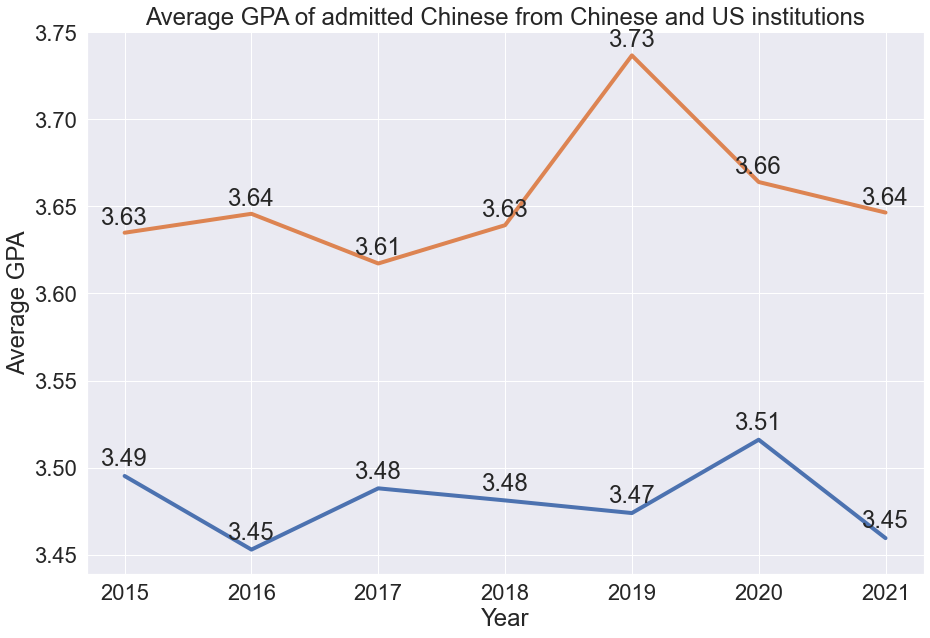

In [86]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
year = [i for i in range(2015,2022)]
plt.plot(year,gpa_china_ins,label='Chinese institution', linewidth=4)
plt.plot(year,gpa_us_ins,label='American institution', linewidth=4)

plt.xlabel("Year")
plt.ylabel("Average GPA")
for a,b in zip(year, gpa_china_ins):
    plt.text(a,b+0.003,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, gpa_us_ins):
    plt.text(a,b+0.002,
             str(b)[:4],
             ha='center', 
             va='bottom')

plt.title("Average GPA of admitted Chinese from Chinese and US institutions")
#plt.legend(fontsize=9,loc='best')
#plt.savefig('./gpa_compare.png')

In [87]:
uslist = []
for i in list(df[df['UR_Decision']=='Admit']['Institution 1 Location']):
    if len(str(i))==2 and i not in uslist:
        uslist.append(i)

In [88]:
ins_loc = []
for p in df['Program (ASE)'].unique():
    data = df[(df['UR_Decision']=='Admit')&(df['Program (ASE)']==p)]
    loc = []
    loc.append(data[data['Institution 1 Location']=='China'].shape[0]/data.shape[0])
    loc.append(data[data['Institution 1 Location'].isin(uslist)].shape[0]/data.shape[0])
    loc.append(data[data['Institution 1 Location']=='India'].shape[0]/data.shape[0])
    ins_loc.append(loc)

In [89]:
x1 = [0,0.3,0.6]
x2 = [i+1.2 for i in x1]
x3 = [i+2.4 for i in x1]

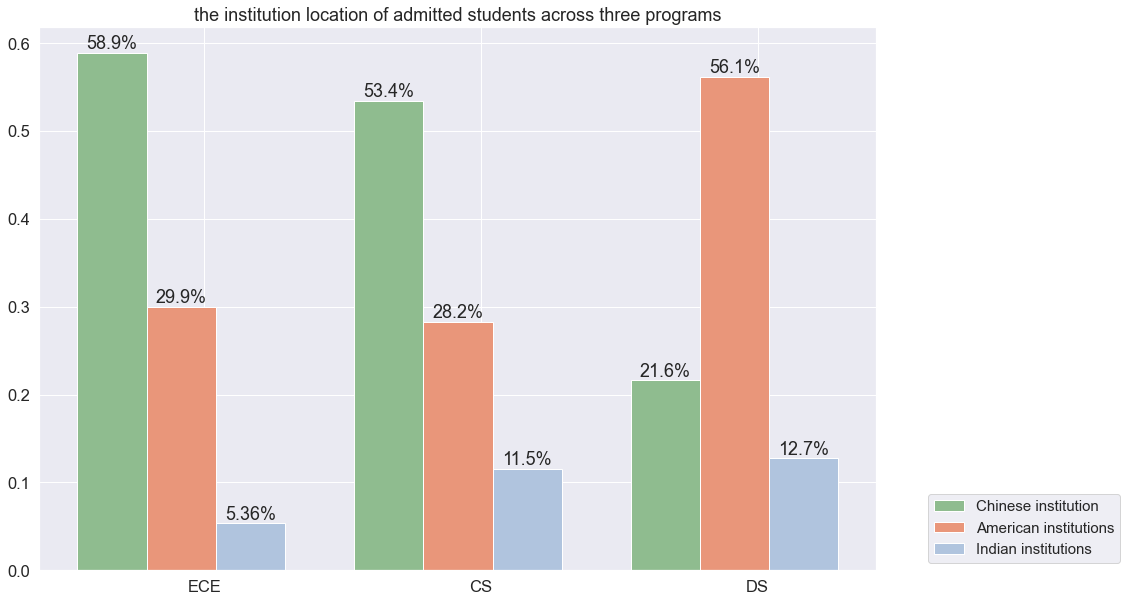

In [90]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
for i in range(3):
    plt.bar(i*1.2,ins_loc[i][0],width=0.3,color='darkseagreen',label='Chinese institution')
    plt.bar(0.3+i*1.2,ins_loc[i][1],width=0.3,color='darksalmon',label='American institutions')
    plt.bar(0.6+i*1.2,ins_loc[i][2],width=0.3,color='lightsteelblue',label='Indian institutions')
for a,b in zip(x1, ins_loc[0]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x2, ins_loc[1]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x3, ins_loc[2]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )

mid = [0.4,1.6,2.8]
plt.xticks(mid,['ECE','CS','DS'])
plt.title("the institution location of admitted students across three programs")
plt.legend(['Chinese institution', 'American institutions', 'Indian institutions'],fontsize=15,bbox_to_anchor=(1, 0, 0.3, 0.2), loc='lower right')
#plt.savefig("./institutions location across programs.png")

4. GPA score

In [91]:
ece_score = []
cs_score = []
ds_score = []
for data in [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]:
    ece_data = data[(data['UR_Decision']=='Admit')&(data['Program (ASE)']=='Electrical and Computer Engineering')]
    ece_data = ece_data[~ece_data['Institution 1 GPA (4.0 Scale)'].isnull()]
    cs_data = data[(data['UR_Decision']=='Admit')&(data['Program (ASE)']=='Computer Science')]
    cs_data = cs_data[~cs_data['Institution 1 GPA (4.0 Scale)'].isnull()]
    ds_data = data[(data['UR_Decision']=='Admit')&(data['Program (ASE)']=='Data Science')]
    ds_data = ds_data[~ds_data['Institution 1 GPA (4.0 Scale)'].isnull()]
    
    ece_score.append(np.mean(ece_data['Institution 1 GPA (4.0 Scale)']))
    cs_score.append(np.mean(cs_data['Institution 1 GPA (4.0 Scale)']))
    ds_score.append(np.mean(ds_data['Institution 1 GPA (4.0 Scale)']))

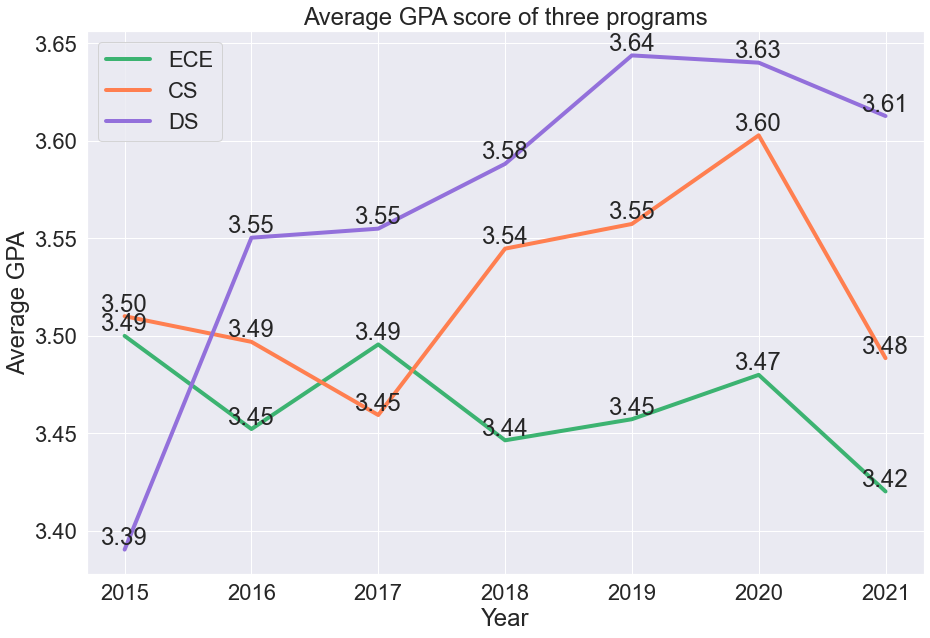

In [92]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.plot(year,ece_score,label='ECE', linewidth=4,color='mediumseagreen')
plt.plot(year,cs_score,label='CS', linewidth=4,color='coral')
plt.plot(year,ds_score,label='DS', linewidth=4,color='mediumpurple')

plt.xlabel("Year")
plt.ylabel("Average GPA")
for a,b in zip(year, ece_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, cs_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')
for a,b in zip(year, ds_score):
    plt.text(a,b,
             str(b)[:4],
             ha='center', 
             va='bottom')

plt.title("Average GPA score of three programs")
plt.legend(loc='upper left')
#plt.savefig("./gpa_three_programs.png")

5. age

In [93]:
df_age = df[(~df['Age at App Submission'].isnull())]
age_interval = ['20~25','25~30','>=30']

In [94]:
age_level = []
for p in list(df['Program (ASE)'].unique()):
    program_data = df_age[(df_age['Program (ASE)']==p)]
    total = program_data.shape[0]
    level = [0]*3
    for i in list(program_data['Age at App Submission']):
        if 20<=i<25:
            level[0] += 1
        elif 25<=i<30:
            level[1] += 1
        elif i>=30:
            level[2] += 1
    for i in range(len(level)):
        level[i] /= total
    age_level.append(level)

In [95]:
age_level[0].insert(0,'ECE')
age_level[1].insert(0,'CS')
age_level[2].insert(0,'DS')

<Figure size 1080x720 with 0 Axes>

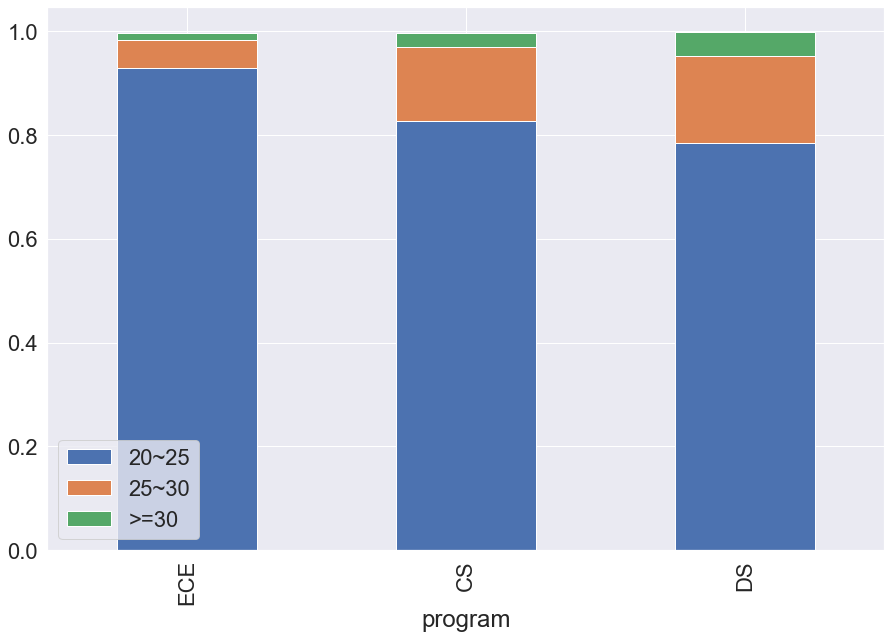

In [96]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
table = pd.DataFrame(age_level, columns=['program']+age_interval)
fig = table.plot(x='program', kind='bar', stacked=True, figsize=(15,10)).get_figure()
plt.savefig("./Fig/age_program.png", bbox_inches = 'tight')

In [97]:
country = ['China','United States','India']
country_age = []

In [98]:
for c in country:
    data = df_age[(df_age['Citizenship1']==c)&(df_age['UR_Decision']=='Admit')]
    age = [0]*3
    for i in (data['Age at App Submission']):
        if 20<=i<25:
            age[0] += 1
        elif 25<=i<30:
            age[1] += 1
        elif i>=30:
            age[2] += 1
    for i in range(3):
        age[i] /= data.shape[0]
    country_age.append(age)

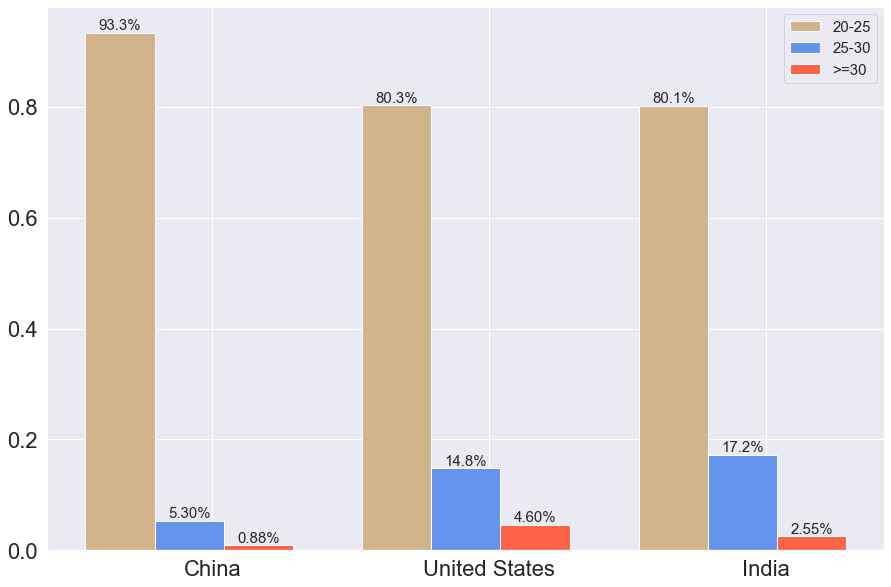

In [99]:
x1 = [i*1.2 for i in range(3)]
x2 = [i+0.3 for i in x1]
x3 = [i+0.6 for i in x1]
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
plt.bar(x1,[i[0] for i in country_age],width=0.3,color='tan',label='20-25')
plt.bar(x2,[i[1] for i in country_age],width=0.3,color='cornflowerblue',label='25-30')
plt.bar(x3,[i[2] for i in country_age],width=0.3,color='tomato',label='>=30')
    
for a,b in zip(x1, [i[0] for i in country_age]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            fontsize=15)
for a,b in zip(x2, [i[1] for i in country_age]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            fontsize=15)
for a,b in zip(x3, [i[2] for i in country_age]):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            fontsize=15)  
#plt.title("age distribution of admitted students in three main countries")
mid = [0.4,1.6,2.8]
plt.xticks(mid,country)
plt.legend(fontsize=15)
plt.savefig("./Fig/age_three_countries", bbox_inches = 'tight')

In [100]:
china_admit = df[(df['UR_Decision']=='Admit')&(df['Citizenship1']=='China')]

In [101]:
age_interval = ['20-22','22~25','25~30','>=30']

In [102]:
uslist = []
for i in list(china_admit['Institution 1 Location']):
    if len(str(i))==2 and i not in uslist:
        uslist.append(i)

In [103]:
us_admit = df[(df['UR_Decision']=='Admit')&(df['Citizenship1']=='China')&df['Institution 1 Location'].isin(uslist)]

In [104]:
age_admit = [0,0,0,0]
admit = china_admit
for i in (admit['Age at App Submission']):
    if 20<=i<23:
        age_admit[0] += 1
    elif 23<=i<25:
        age_admit[1] += 1  
    elif 25<=i<30:
        age_admit[2] += 1
    elif i>=30:
        age_admit[3] += 1
for i in range(len(age_admit)):
    age_admit[i] /= admit.shape[0]

In [105]:
age_accept = [0,0,0,0]
accept = us_admit
for i in (accept['Age at App Submission']):
    if 20<=i<23:
        age_accept[0] += 1
    elif 23<=i<25:
        age_accept[1] += 1 
    elif 25<=i<30:
        age_accept[2] += 1
    elif i>=30:
        age_accept[3] += 1
for i in range(len(age_accept)):
    age_accept[i] /= accept.shape[0]

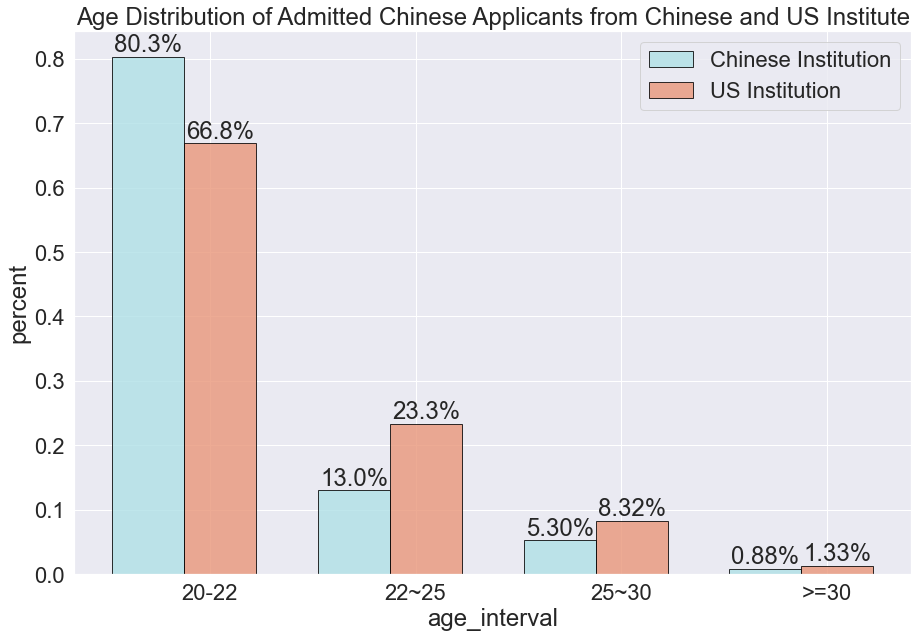

In [106]:
sns.set(font_scale=2)
plt.figure(figsize=(15,10))
x1 = [i for i in range(4)]
x2 = [i+0.35 for i in x1]
plt.bar(x1,age_admit,width=0.35,color='powderblue',label='Chinese Institution', alpha=0.8,edgecolor = "black")
plt.bar(x2,age_accept,width=0.35,color='darksalmon',label='US Institution', alpha=0.8,edgecolor = "black")

for a,b in zip(x1,age_admit):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
for a,b in zip(x2, age_accept):
    plt.text(a,b,
             str(b*100)[:4]+'%',
             ha='center', 
             va='bottom',
            )
plt.legend()
plt.xlabel("age_interval")
plt.ylabel("percent")
plt.title("Age Distribution of Admitted Chinese Applicants from Chinese and US Institute")
plt.xticks([0.3,1.3,2.3,3.3],age_interval)
plt.savefig("./age_admit_accept.png")

### Session 3

1. Sub-categroy of majors

In [107]:
df['Sub-Category'].value_counts()

Artificial Intelligence                    1861
Statistical Methodology                    1485
Multiple Areas                              816
Signal and Image Processing                 754
Circuit and Computer Systems                683
Business and Social Science                 588
Systems                                     393
Communications                              363
Computational Methods                       328
Human-Computer Interaction                  302
Nanoscale Electronics & Photonics           275
Musical Acoustics and Signal Processing     239
Health and Biomedical Sciences              197
Power and Smart Grid                         75
Theory                                       68
Other                                        50
Quantum Engineering                           7
Biomedical Ultrasound                         2
Computer Science                              1
Name: Sub-Category, dtype: int64

In [108]:
df_DS = df[df['Program (ASE)']=='Data Science']
df_DS['Sub-Category'].value_counts()

Statistical Methodology           1484
Business and Social Science        584
Computational Methods              315
Health and Biomedical Sciences     197
Other                               50
Quantum Engineering                  5
Artificial Intelligence              4
Systems                              2
Human-Computer Interaction           2
Multiple Areas                       1
Name: Sub-Category, dtype: int64

<Figure size 720x720 with 0 Axes>

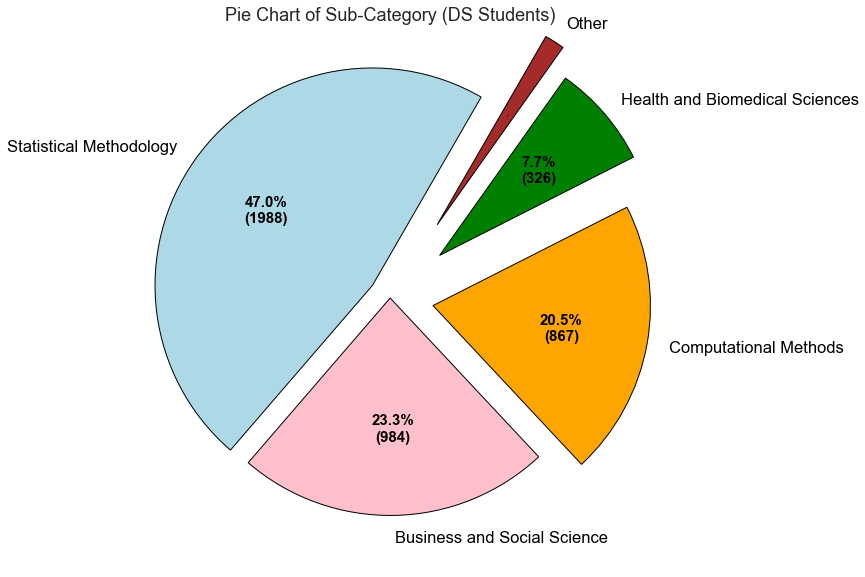

In [109]:
# plot pie chart
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
SubCategory = ['Statistical Methodology', 'Business and Social Science','Computational Methods','Health and Biomedical Sciences','Other']
data = [1988,985,867,326,63]
explode = (0.1, 0.0, 0.2, 0.3,0.4)
colors = ("lightblue", "pink","orange", "green", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = SubCategory,
                                  shadow = False,
                                  colors = colors,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#ax.legend(wedges,SubCategory,title ="Sub-Category",loc ="center left",bbox_to_anchor =(0, 0, 0, 0))
 
plt.setp(autotexts[0:4], size = 15, weight ="bold")
plt.setp(autotexts[4::], size = 0, weight ="bold")
ax.set_title("Pie Chart of Sub-Category (DS Students)")
 
# show plot
plt.show()

In [110]:
df_CS = df[df['Program (ASE)']=='Computer Science']
df_CS['Sub-Category'].value_counts()

Artificial Intelligence         1857
Multiple Areas                   815
Systems                          391
Human-Computer Interaction       300
Theory                            68
Computational Methods              9
Business and Social Science        4
Biomedical Ultrasound              1
Circuit and Computer Systems       1
Statistical Methodology            1
Computer Science                   1
Quantum Engineering                1
Name: Sub-Category, dtype: int64

<Figure size 720x720 with 0 Axes>

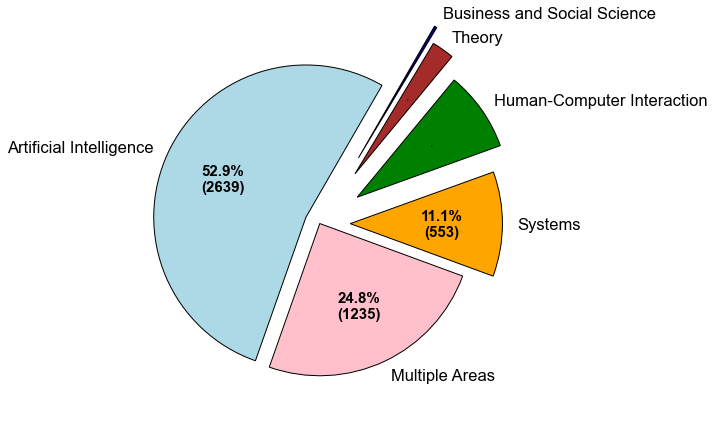

In [111]:
# plot pie chart
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
SubCategory2 = ['Artificial Intelligence', 'Multiple Areas','Systems','Human-Computer Interaction','Theory','Business and Social Science']
data2 = [2639,1235,554,423,119,14]
explode2 = (0.1, 0.0, 0.2, 0.3,0.4,0.5)
colors2 = ( "lightblue", "pink","orange", "green", "brown","navy")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data2,
                                  autopct = lambda pct: func(pct, data2),
                                  explode = explode2,
                                  labels = SubCategory2,
                                  shadow = False,
                                  colors = colors2,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
#ax.legend(wedges, SubCategory2,title ="Sub-category",loc ="center left",bbox_to_anchor =(0, 0, 0, 0))

plt.setp(autotexts[0:3], size = 15, weight ="bold")
plt.setp(autotexts[3::], size = 0, weight ="bold")
#ax.set_title("Pie Chart of Sub-Category (CS Students)")
 
# show plot
plt.show()

In [112]:
df_ECE = df[df['Program (ASE)']=='Electrical and Computer Engineering']
df_ECE['Sub-Category'].value_counts()

Signal and Image Processing                754
Circuit and Computer Systems               682
Communications                             363
Nanoscale Electronics & Photonics          275
Musical Acoustics and Signal Processing    239
Power and Smart Grid                        75
Computational Methods                        4
Biomedical Ultrasound                        1
Quantum Engineering                          1
Name: Sub-Category, dtype: int64

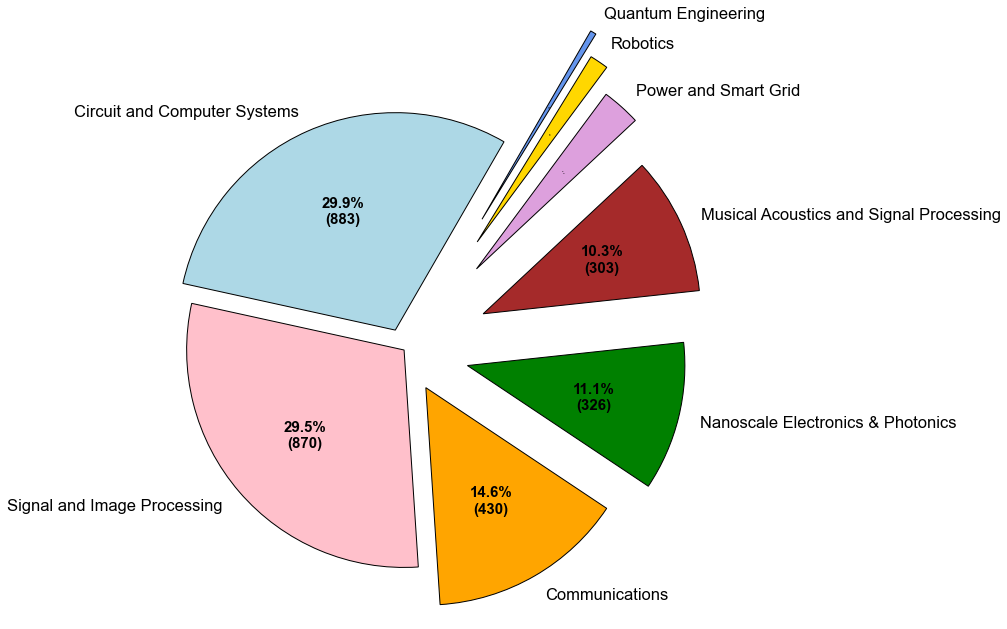

In [113]:
# plot pie chart
sns.set(font_scale=1.5)

SubCategory3 = ['Circuit and Computer Systems', 'Signal and Image Processing','Communications','Nanoscale Electronics & Photonics','Musical Acoustics and Signal Processing','Power and Smart Grid','Robotics','Quantum Engineering']
data3 = [883,871,431,327,303,85,41,13]
explode3 = (0.1,0.0,0.2,0.3,0.4,0.5,0.6,0.7)
colors3 = ( "lightblue","pink","orange","green","brown","plum","gold","cornflowerblue")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 10))
wedges, texts, autotexts = ax.pie(data3,
                                  autopct = lambda pct: func(pct, data3),
                                  explode = explode3,
                                  labels = SubCategory3,
                                  shadow = False,
                                  colors = colors3,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))

plt.setp(autotexts[0:5], size = 15, weight ="bold")
plt.setp(autotexts[5::], size = 0, weight ="bold")
#ax.set_title("Pie Chart of Sub-Category (ECE Students)")
 
# show plot
plt.show()

In [114]:
df['How Applicant Heard About UR'].value_counts()

Family/Friend                                                              2491
University of Rochester reputation/word of mouth                           2297
Internet search                                                            2124
Referral from someone at my school (mentor/advisor/faculty)                 525
Other                                                                       205
Third-party website (e.g.  gradschools.com, Peterson’s, etc.)               200
Mailing                                                                     136
Recruitment email                                                           132
Previous participant in a program at the University of Rochester            127
Read a publication by a faculty member from the University of Rochester      90
Local resident (current or past)                                             54
Referral from an affiliate of the University of Rochester                    36
Recruitment/Graduate School fair        

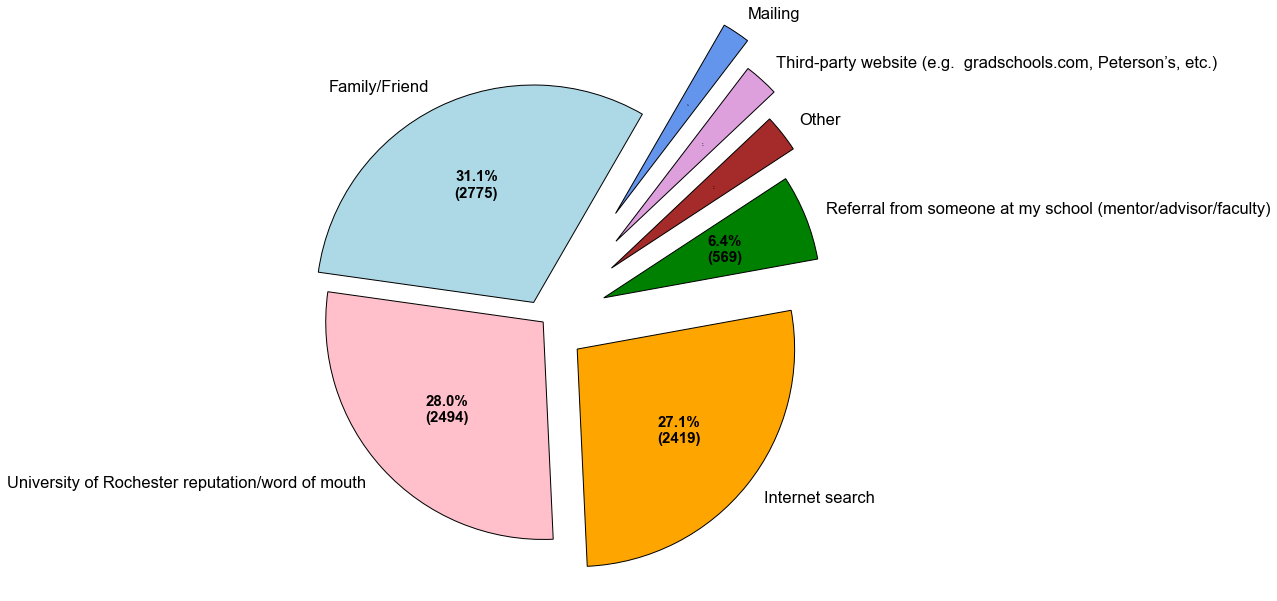

In [115]:
# plot pie chart
sns.set(font_scale=1.5)
SubCategory4 = ['Family/Friend', 'University of Rochester reputation/word of mouth','Internet search','Referral from someone at my school (mentor/advisor/faculty)','Other','Third-party website (e.g.  gradschools.com, Peterson’s, etc.)','Mailing']
data4 = [2775,2494,2419,569,250,230,183]
explode4 = (0.1,0.0,0.2,0.3,0.4,0.5,0.6)
colors4 = ( "lightblue","pink","orange","green","brown","plum","cornflowerblue")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 10))
wedges, texts, autotexts = ax.pie(data4,
                                  autopct = lambda pct: func(pct, data4),
                                  explode = explode4,
                                  labels = SubCategory4,
                                  shadow = False,
                                  colors = colors4,
                                  startangle = 60,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))

 
plt.setp(autotexts[0:4], size = 15, weight ="bold")
plt.setp(autotexts[4::], size = 0, weight ="bold")
#ax.set_title("Pie Chart of How Applicants Heard About UR")
 
# show plot
plt.show()

2. Trend of sub-category major

In [116]:
#decision from ur and applicant
df['UR_Decision'] = df['Decision 1'].apply(urdecision)
df['Applicant_Decision'] = df.apply(lambda x: applicant_decision(x['Decision 1'],x['Decision 2'],x['UR_Decision'])
                                    ,axis=1)

In [117]:
year = [datetime.strptime(term[-4:], '%Y') for term in df["Entry Term"]]
df["Year"] = year

In [118]:
ds_df = df[df['Program (ASE)']=='Data Science']

In [119]:
admit_df = ds_df[ds_df['UR_Decision']=='Admit']
admit_df['Sub-Category']=admit_df['Sub-Category'].replace('Computational Methods','Statistical Methodology')
admit_group = admit_df.groupby(['Year','Sub-Category'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Sub-Category'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

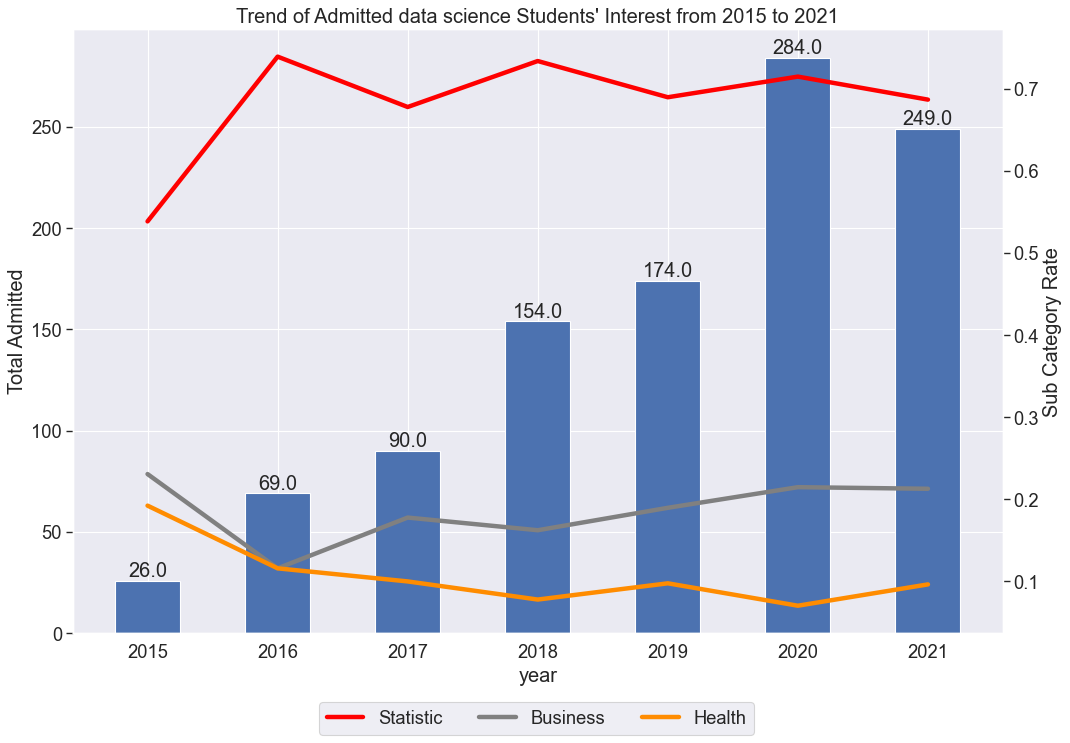

In [120]:
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)

ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted data science Students\' Interest from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
ax2.grid(False)
f1=ax2.plot(year,sub_rate['Statistical Methodology'],color='red',label='Statistic',linewidth=4)
f2=ax2.plot(year,sub_rate['Business and Social Science'],color='grey', label='Business',linewidth=4)
f2=ax2.plot(year,sub_rate['Health and Biomedical Sciences'],color='darkorange', label='Health',linewidth=4)
fig.legend(bbox_to_anchor=(0.7, 0.05),loc='upper right',ncol=3)
ax2.set_ylabel("Sub Category Rate")
plt.show()

In [121]:
cs_df = df[df['Program (ASE)']=='Computer Science']

In [122]:
admit_df = cs_df[cs_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','Sub-Category'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Sub-Category'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

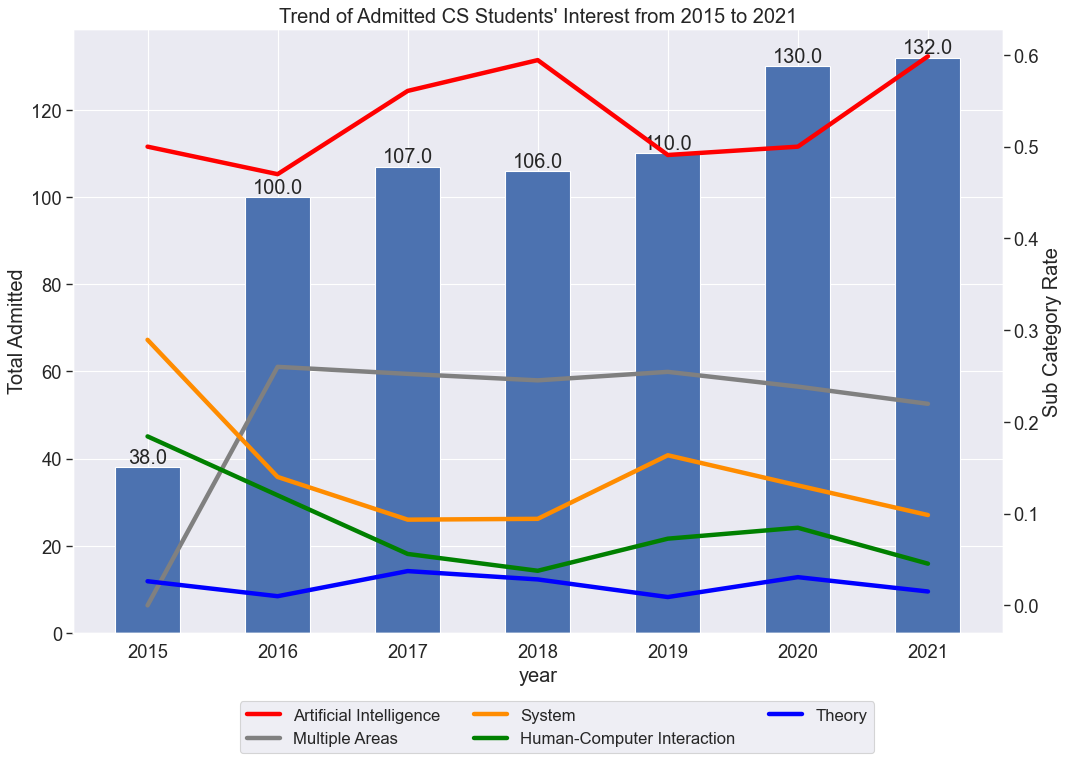

In [123]:
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted CS Students\' Interest from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Artificial Intelligence'],color='red',label='Artificial Intelligence',linewidth=4)
f2=ax2.plot(year,sub_rate['Multiple Areas'],color='grey', label='Multiple Areas',linewidth=4)
f3=ax2.plot(year,sub_rate['Systems'],color='darkorange', label='System',linewidth=4)
f4=ax2.plot(year,sub_rate['Human-Computer Interaction'],color='green', label='Human-Computer Interaction',linewidth=4)
f5=ax2.plot(year,sub_rate['Theory'],color='blue', label='Theory',linewidth=4)
ax2.grid(False)
fig.legend(bbox_to_anchor=(0.8,0.05),loc='upper right',ncol=3,fontsize=15)
ax2.set_ylabel("Sub Category Rate")
plt.show()


In [124]:
ece_df = df[df['Program (ASE)']=='Electrical and Computer Engineering']

In [125]:
admit_df = ece_df[ece_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','Sub-Category'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Sub-Category'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

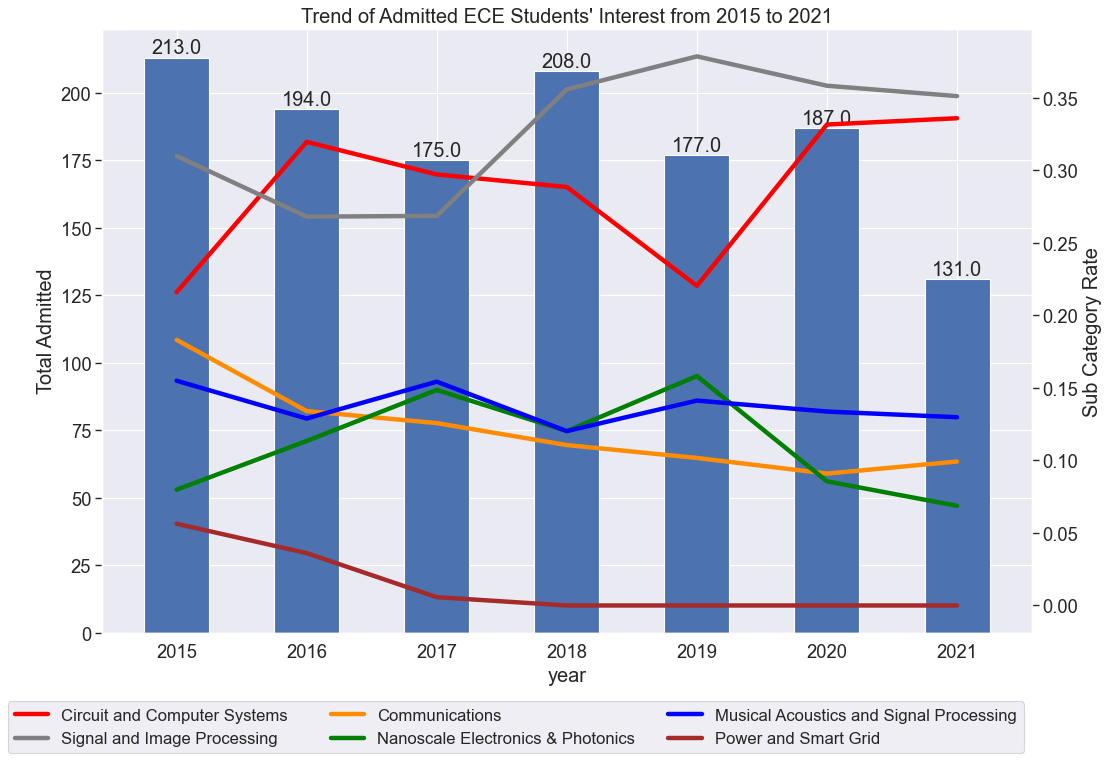

In [126]:
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted ECE Students\' Interest from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Circuit and Computer Systems'],linewidth=4,color='red',label='Circuit and Computer Systems  ')
f2=ax2.plot(year,sub_rate['Signal and Image Processing'],linewidth=4,color='grey', label='Signal and Image Processing')
f3=ax2.plot(year,sub_rate['Communications'],linewidth=4,color='darkorange', label='Communications')
f4=ax2.plot(year,sub_rate['Nanoscale Electronics & Photonics'],linewidth=4,color='green', label='Nanoscale Electronics & Photonics')
f5=ax2.plot(year,sub_rate['Musical Acoustics and Signal Processing'],linewidth=4,color='blue', label='Musical Acoustics and Signal Processing')
f6=ax2.plot(year,sub_rate['Power and Smart Grid'],linewidth=4,color='brown', label='Power and Smart Grid')
fig.legend(bbox_to_anchor=(0.9,0.05),loc='upper right',ncol=3,fontsize=15)
ax2.set_ylabel("Sub Category Rate")
ax2.grid(False)
plt.show()

3. Trend of applicants' employment status 

In [127]:
ece_df = df[df['Program (ASE)']=='Electrical and Computer Engineering']

In [128]:
admit_df = ece_df[ece_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','Currently Employed?'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Currently Employed?'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

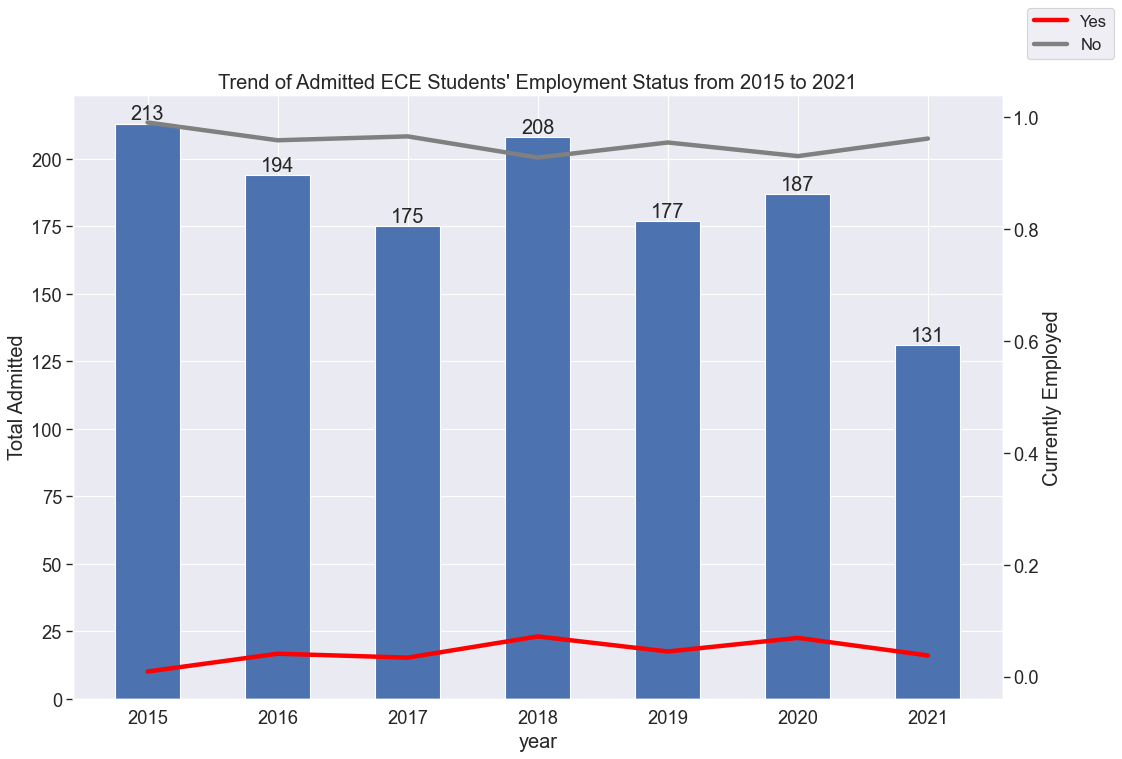

In [129]:
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted ECE Students\' Employment Status from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Yes'],linewidth=4,color='red',label='Yes')
f2=ax2.plot(year,sub_rate['No'],linewidth=4,color='grey', label='No')


fig.legend(fontsize=15)
ax2.set_ylabel("Currently Employed")
ax2.grid(False)
plt.show()

In [130]:
cs_df = df[df['Program (ASE)']=='Computer Science']

In [131]:
admit_df = cs_df[cs_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','Currently Employed?'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Currently Employed?'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

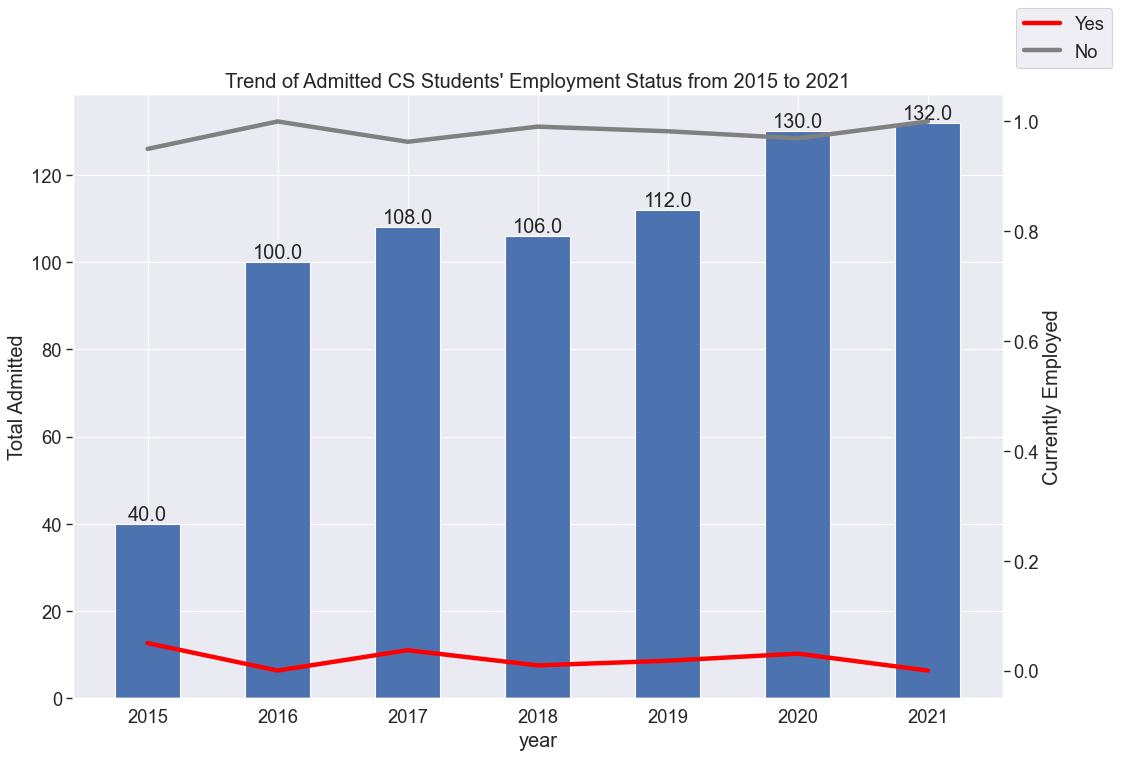

In [132]:
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted CS Students\' Employment Status from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Yes'],linewidth=4,color='red',label='Yes')
f2=ax2.plot(year,sub_rate['No'],linewidth=4,color='grey', label='No')

fig.legend()
ax2.set_ylabel("Currently Employed")
ax2.grid(False)
plt.show()

In [133]:
ds_df = df[df['Program (ASE)']=='Data Science']

In [134]:
admit_df = ds_df[ds_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','Currently Employed?'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'Currently Employed?'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

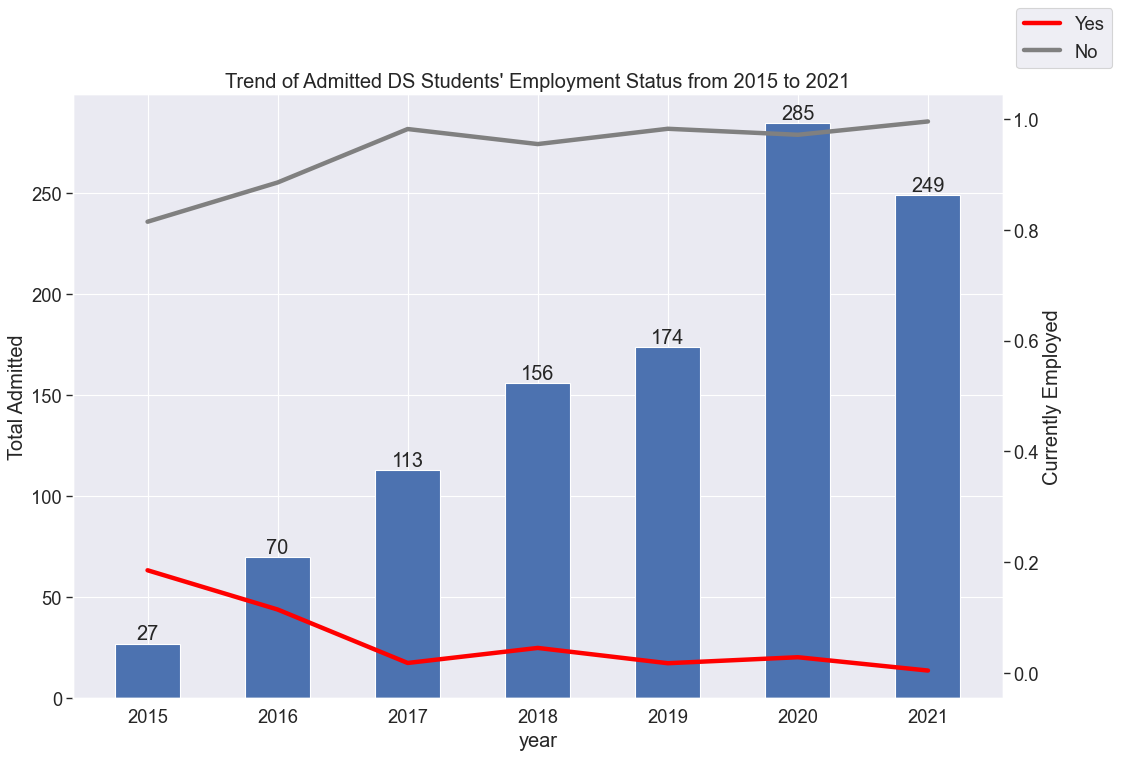

In [135]:
sns.set(font_scale=1.5)
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted DS Students\' Employment Status from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Yes'],linewidth=4,color='red',label='Yes')
f2=ax2.plot(year,sub_rate['No'],linewidth=4,color='grey', label='No')


fig.legend()
ax2.set_ylabel("Currently Employed")
ax2.grid(False)
plt.show()

4. Trend of how applicants heard about UR

In [136]:
ds_df = df[df['Program (ASE)']=='Data Science']

In [137]:
admit_df = ds_df[ds_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','How Applicant Heard About UR'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'How Applicant Heard About UR'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

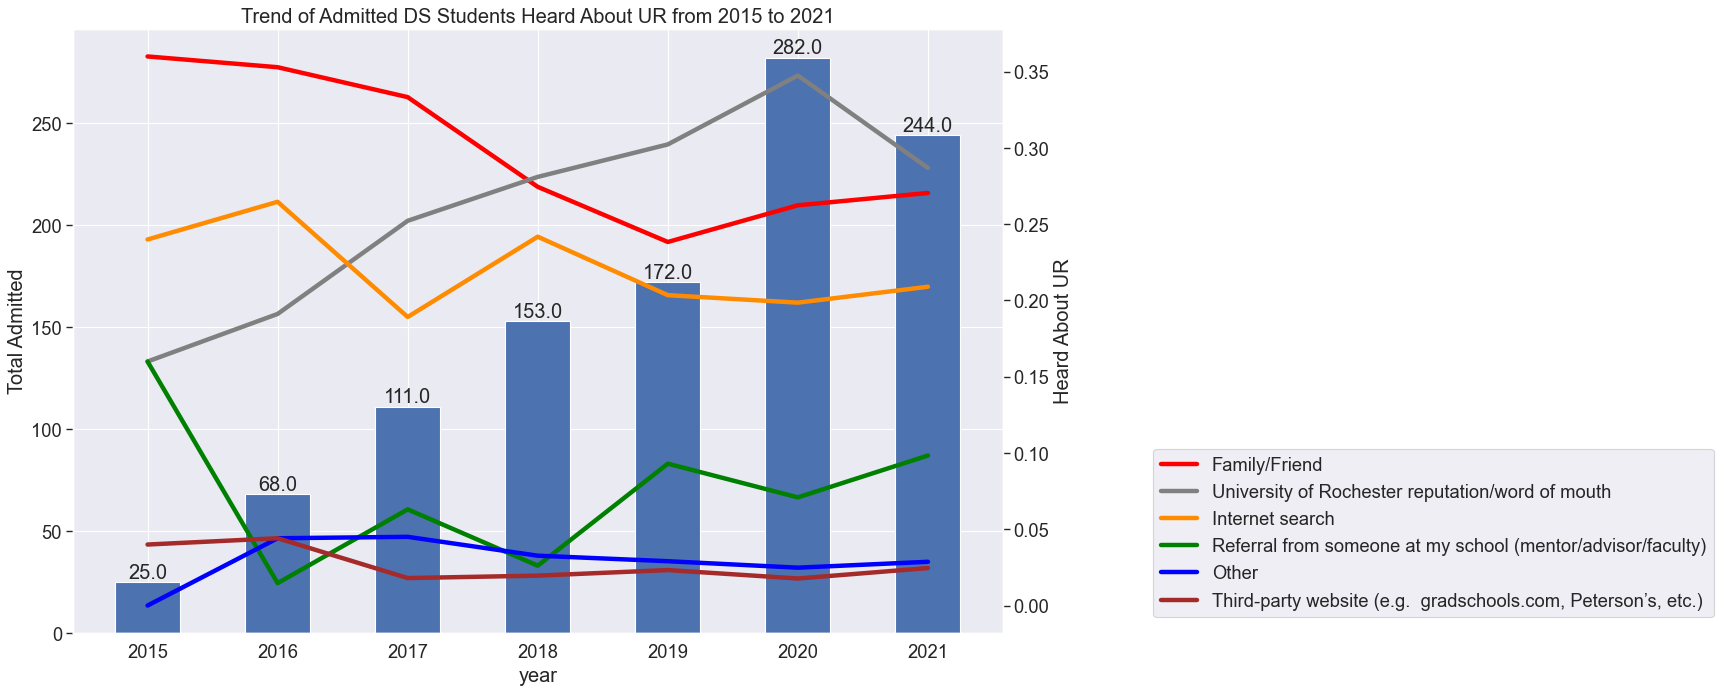

In [138]:
sns.set(font_scale=1.5)
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted DS Students Heard About UR from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Family/Friend'],linewidth=4,color='red',label='Family/Friend')
f2=ax2.plot(year,sub_rate['University of Rochester reputation/word of mouth'],linewidth=4,color='grey', label='University of Rochester reputation/word of mouth')
f3=ax2.plot(year,sub_rate['Internet search'],linewidth=4,color='darkorange', label='Internet search')
f4=ax2.plot(year,sub_rate['Referral from someone at my school (mentor/advisor/faculty)'],linewidth=4,color='green', label='Referral from someone at my school (mentor/advisor/faculty)')
f5=ax2.plot(year,sub_rate['Other'],linewidth=4,color='blue', label='Other')
f6=ax2.plot(year,sub_rate['Third-party website (e.g.  gradschools.com, Peterson’s, etc.)'],linewidth=4,color='brown', label='Third-party website (e.g.  gradschools.com, Peterson’s, etc.)')


fig.legend(loc='right',ncol=1,bbox_to_anchor=(1, 0., 0.5, 0.5))
ax2.set_ylabel("Heard About UR")
ax2.grid(False)

plt.show()

In [139]:
cs_df = df[df['Program (ASE)']=='Computer Science']

In [140]:
admit_df = cs_df[cs_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','How Applicant Heard About UR'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'How Applicant Heard About UR'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

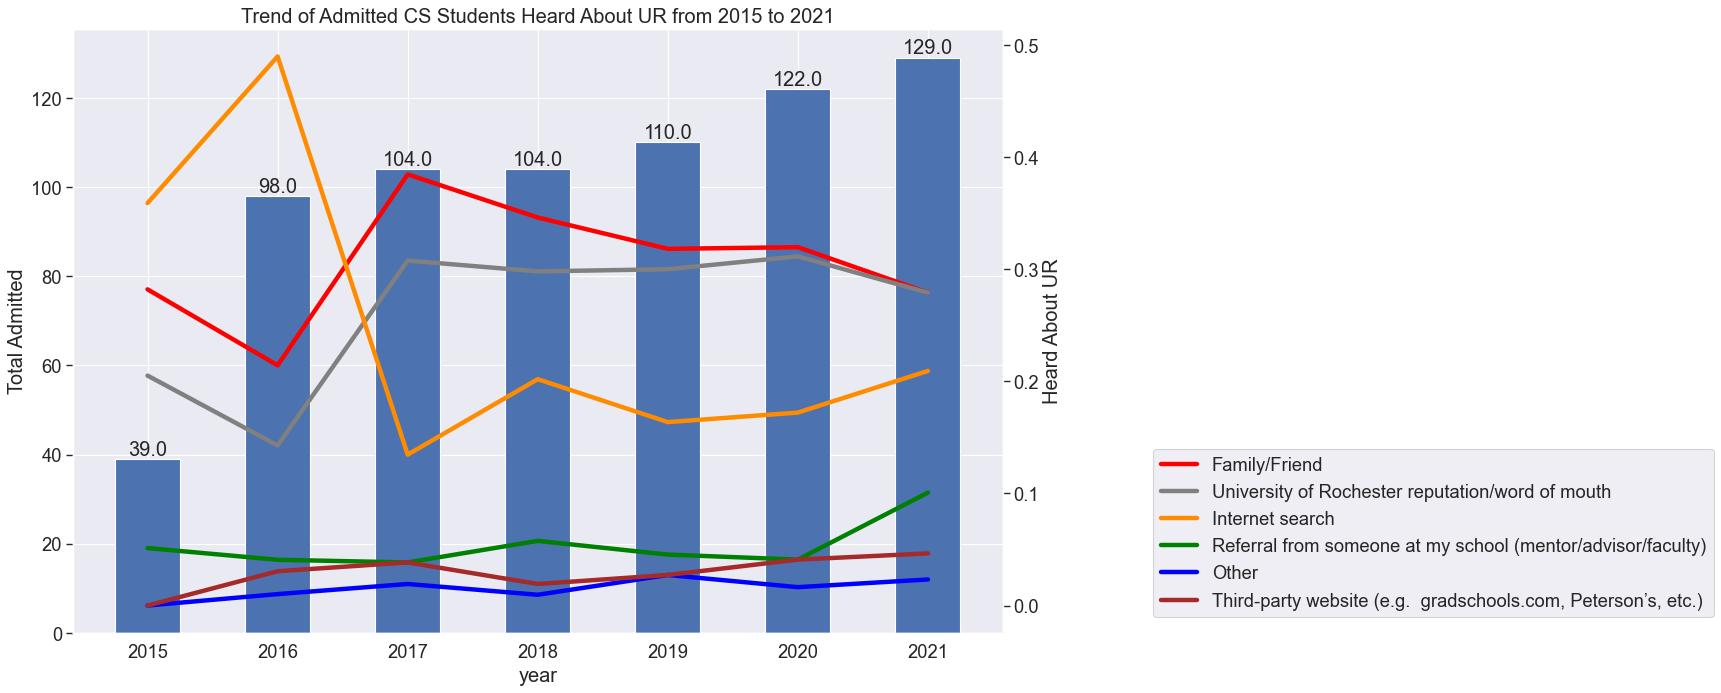

In [141]:
sns.set(font_scale=1.5)
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted CS Students Heard About UR from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Family/Friend'],linewidth=4,color='red',label='Family/Friend')
f2=ax2.plot(year,sub_rate['University of Rochester reputation/word of mouth'],linewidth=4,color='grey', label='University of Rochester reputation/word of mouth')
f3=ax2.plot(year,sub_rate['Internet search'],linewidth=4,color='darkorange', label='Internet search')
f4=ax2.plot(year,sub_rate['Referral from someone at my school (mentor/advisor/faculty)'],linewidth=4,color='green', label='Referral from someone at my school (mentor/advisor/faculty)')
f5=ax2.plot(year,sub_rate['Other'],linewidth=4,color='blue', label='Other')
f6=ax2.plot(year,sub_rate['Third-party website (e.g.  gradschools.com, Peterson’s, etc.)'],linewidth=4,color='brown', label='Third-party website (e.g.  gradschools.com, Peterson’s, etc.)')


fig.legend(loc='right',ncol=1,bbox_to_anchor=(1, 0., 0.5, 0.5))
ax2.set_ylabel("Heard About UR")
ax2.grid(False)
plt.show()

In [142]:
ece_df = df[df['Program (ASE)']=='Electrical and Computer Engineering']

In [143]:
admit_df = ece_df[ece_df['UR_Decision']=='Admit']
admit_group = admit_df.groupby(['Year','How Applicant Heard About UR'],as_index=False)['Ref'].count()
admit_index=admit_group.set_index(['Year', 'How Applicant Heard About UR'])
admit_index=admit_index.unstack().fillna(0)
admit_index.columns=admit_index.columns.droplevel()
sub_rate=admit_index.div(admit_index.sum(axis=1), axis='index')

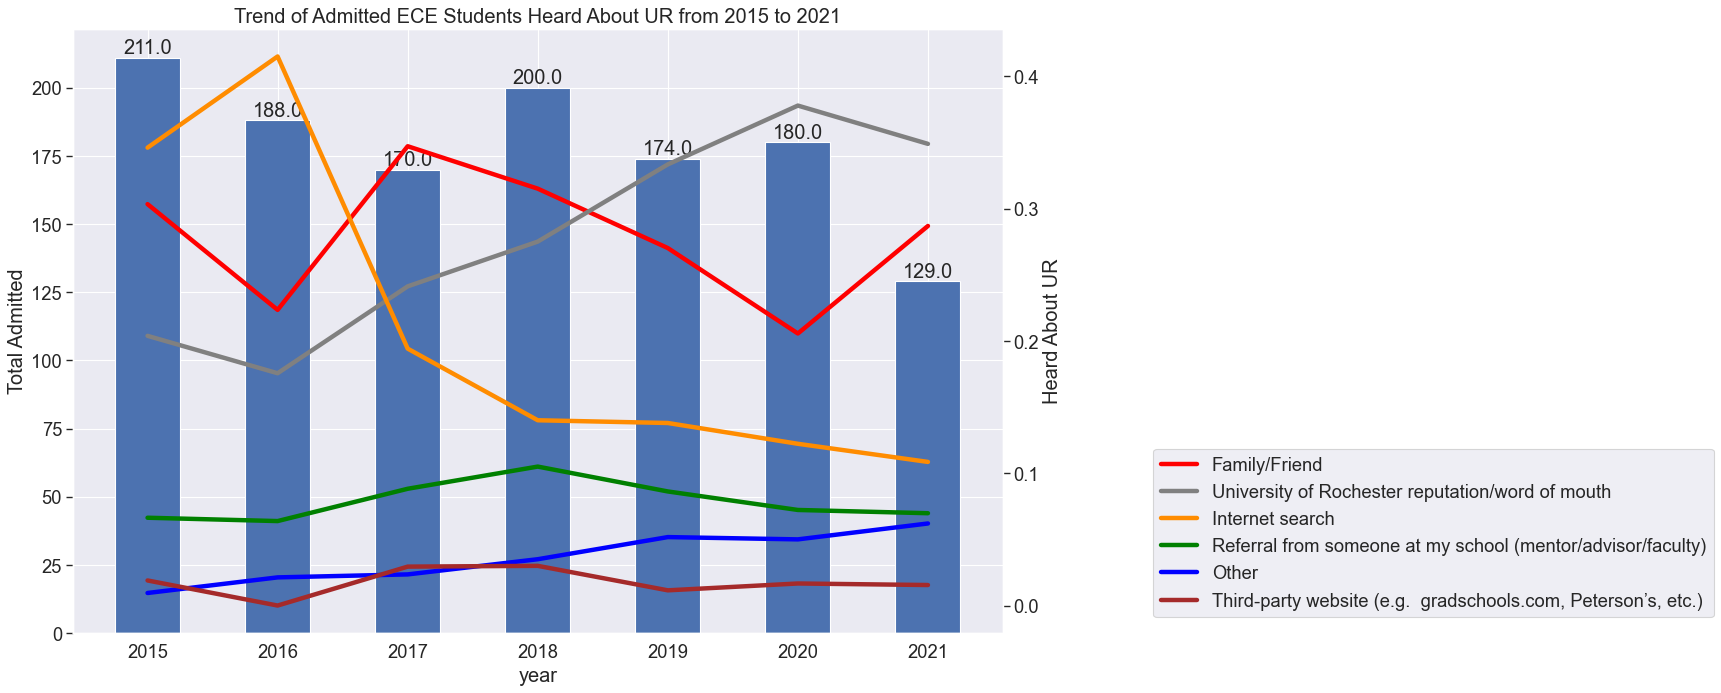

In [144]:
sns.set(font_scale=1.5)
year = [i for i in range(2015,2022)]
fig=plt.figure(figsize=(15,10), dpi=80)
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax1 = fig.add_subplot(111)
ax1.bar(year,admit_index.sum(axis=1),width=0.5)
ax1.set_title('Trend of Admitted ECE Students Heard About UR from 2015 to 2021')
ax1.set_xlabel("year")
ax1.set_ylabel("Total Admitted")
for a,b in zip(year,admit_index.sum(axis=1)):
    ax1.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )
ax2 = ax1.twinx()
f1=ax2.plot(year,sub_rate['Family/Friend'],linewidth=4,color='red',label='Family/Friend')
f2=ax2.plot(year,sub_rate['University of Rochester reputation/word of mouth'],linewidth=4,color='grey', label='University of Rochester reputation/word of mouth')
f3=ax2.plot(year,sub_rate['Internet search'],linewidth=4,color='darkorange', label='Internet search')
f4=ax2.plot(year,sub_rate['Referral from someone at my school (mentor/advisor/faculty)'],linewidth=4,color='green', label='Referral from someone at my school (mentor/advisor/faculty)')
f5=ax2.plot(year,sub_rate['Other'],linewidth=4,color='blue', label='Other')
f6=ax2.plot(year,sub_rate['Third-party website (e.g.  gradschools.com, Peterson’s, etc.)'],linewidth=4,color='brown', label='Third-party website (e.g.  gradschools.com, Peterson’s, etc.)')

fig.legend(loc='right',ncol=1,bbox_to_anchor=(1, 0., 0.5, 0.5))
ax2.set_ylabel("Heard About UR")
ax2.grid(False)
plt.show()